In [4]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline

In [5]:
#  import the dataset
df = pd.read_csv('MallCustomers.csv')
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X=df.iloc[:, [3, 4]].values

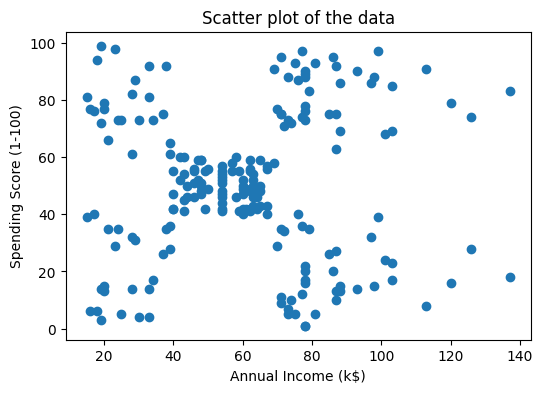

In [7]:
# plotting the data using a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X[:,0], X[:,1])
plt.title('Scatter plot of the data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [8]:
# Agglomerative Hierarchical Clustering 
from scipy.cluster.hierarchy import dendrogram, linkage

single_clustering=linkage(X, method='single', metric='euclidean')
complete_clustering=linkage(X, method='complete', metric='euclidean')
average_clustering=linkage(X, method='average', metric='euclidean')
ward_clustering=linkage(X, method='ward', metric='euclidean')


##### Complete Linkage
###### Best for: Datasets where the distance between the most distant points in the clusters being merged is the most important factor. This method is less sensitive to outliers.
###### Use Case: When you want to ensure that the clusters are as far apart as possible, which might be useful in certain applications where you want to maximize the separation between clusters.

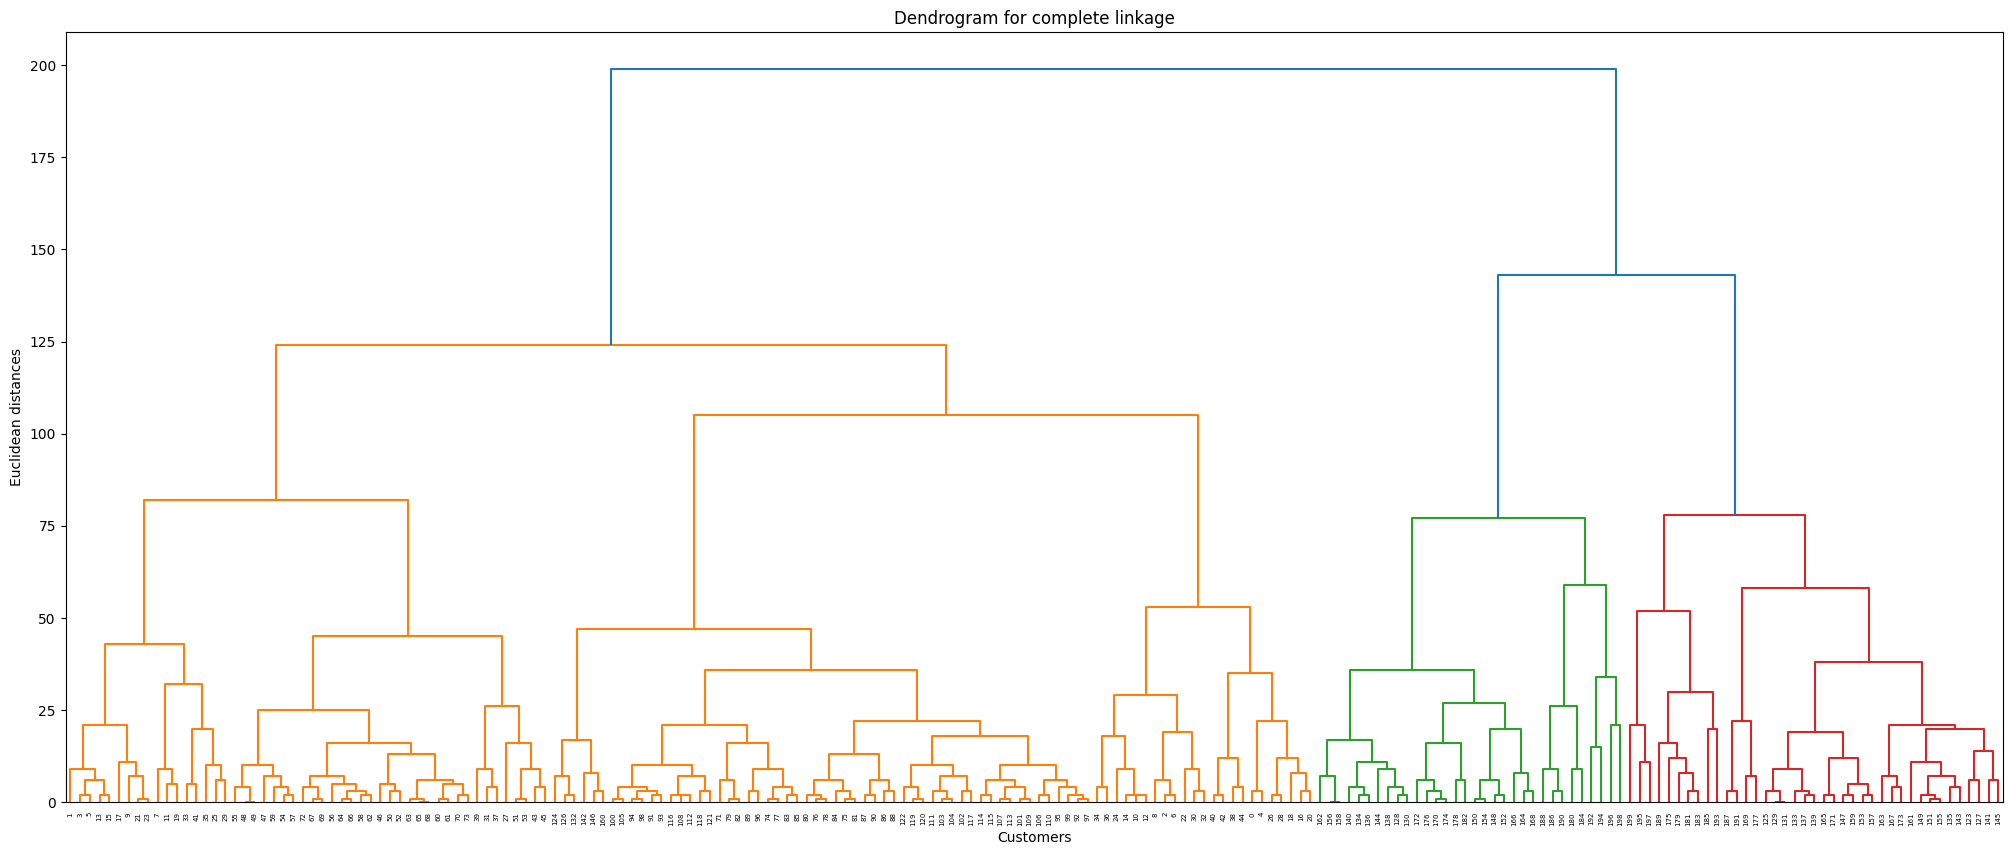

In [102]:
#  plotting the dendrogram for complete linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for complete linkage')
dendrogram(complete_clustering)
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


##### Average Linkage
###### Best for: Datasets where the average distance between all points in the clusters being merged is the most important factor. This method is a compromise between single and complete linkage.
###### Use Case: When you want a balance between compactness and separation of clusters, and you're not overly concerned about outliers.

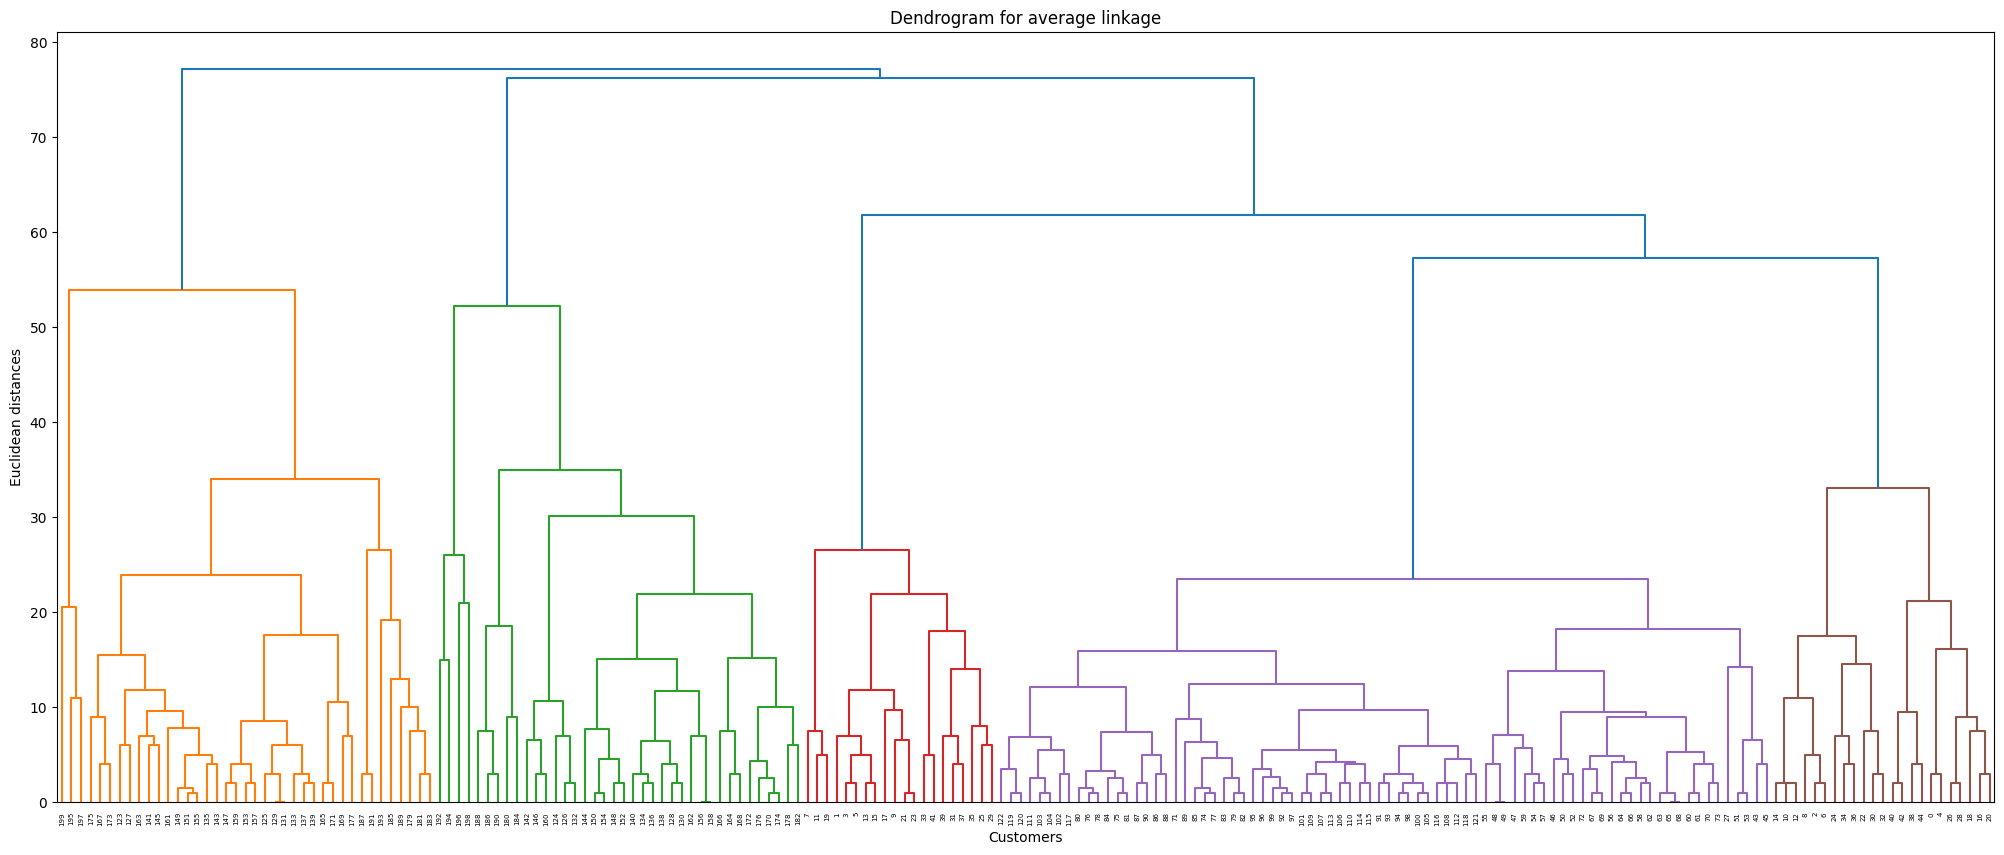

In [103]:
# plotting the dendrogram for average linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for average linkage')
dendrogram(average_clustering)
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

##### Single Linkage
###### Best for: Datasets where the distance between any two points in the clusters being merged is the most important factor. This method is sensitive to outliers.
###### Use Case: When you want to ensure that the clusters are as compact as possible, even if it means including outliers.

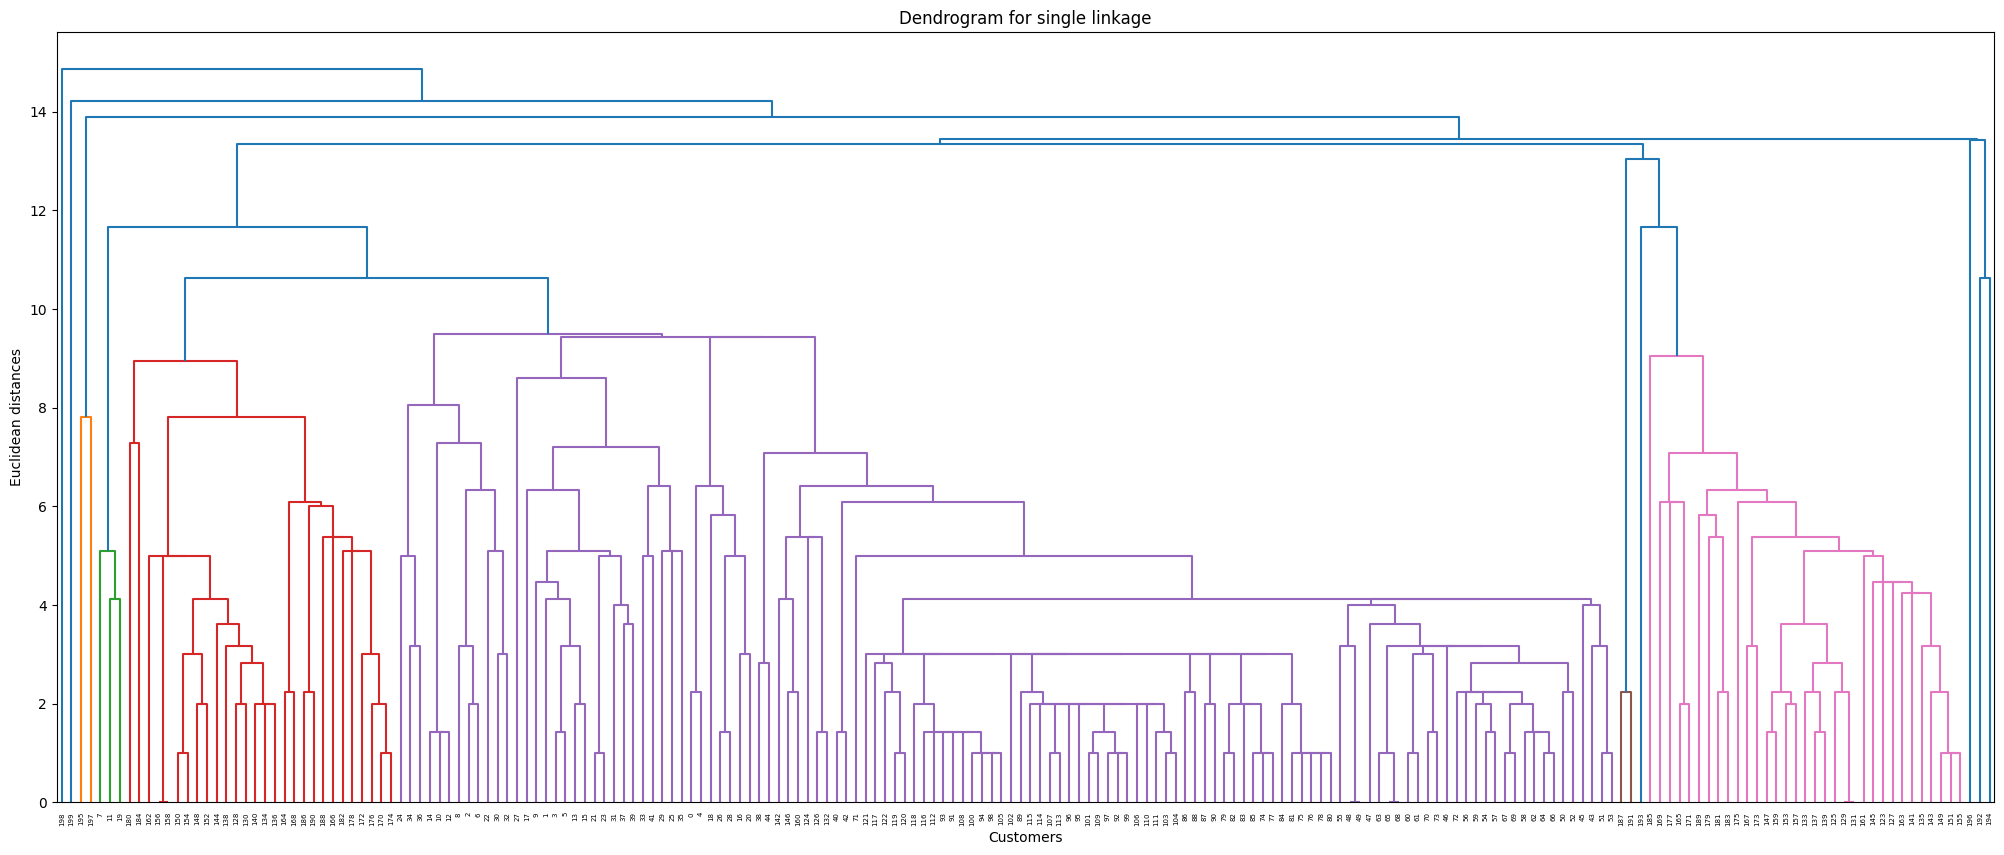

In [11]:
# plotting the dendrogram for single linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for single linkage')
dendrogram(single_clustering)
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

##### Ward's Linkage
###### Best for: Datasets where the goal is to minimize the variance within clusters. Ward's method is particularly effective for datasets with clusters of different sizes.
###### Use Case: When you want to ensure that the clusters are as compact as possible, but you also want to minimize the variance within each cluster. This method is efficient and can be more accurate than other methods for datasets with clusters of different sizes.

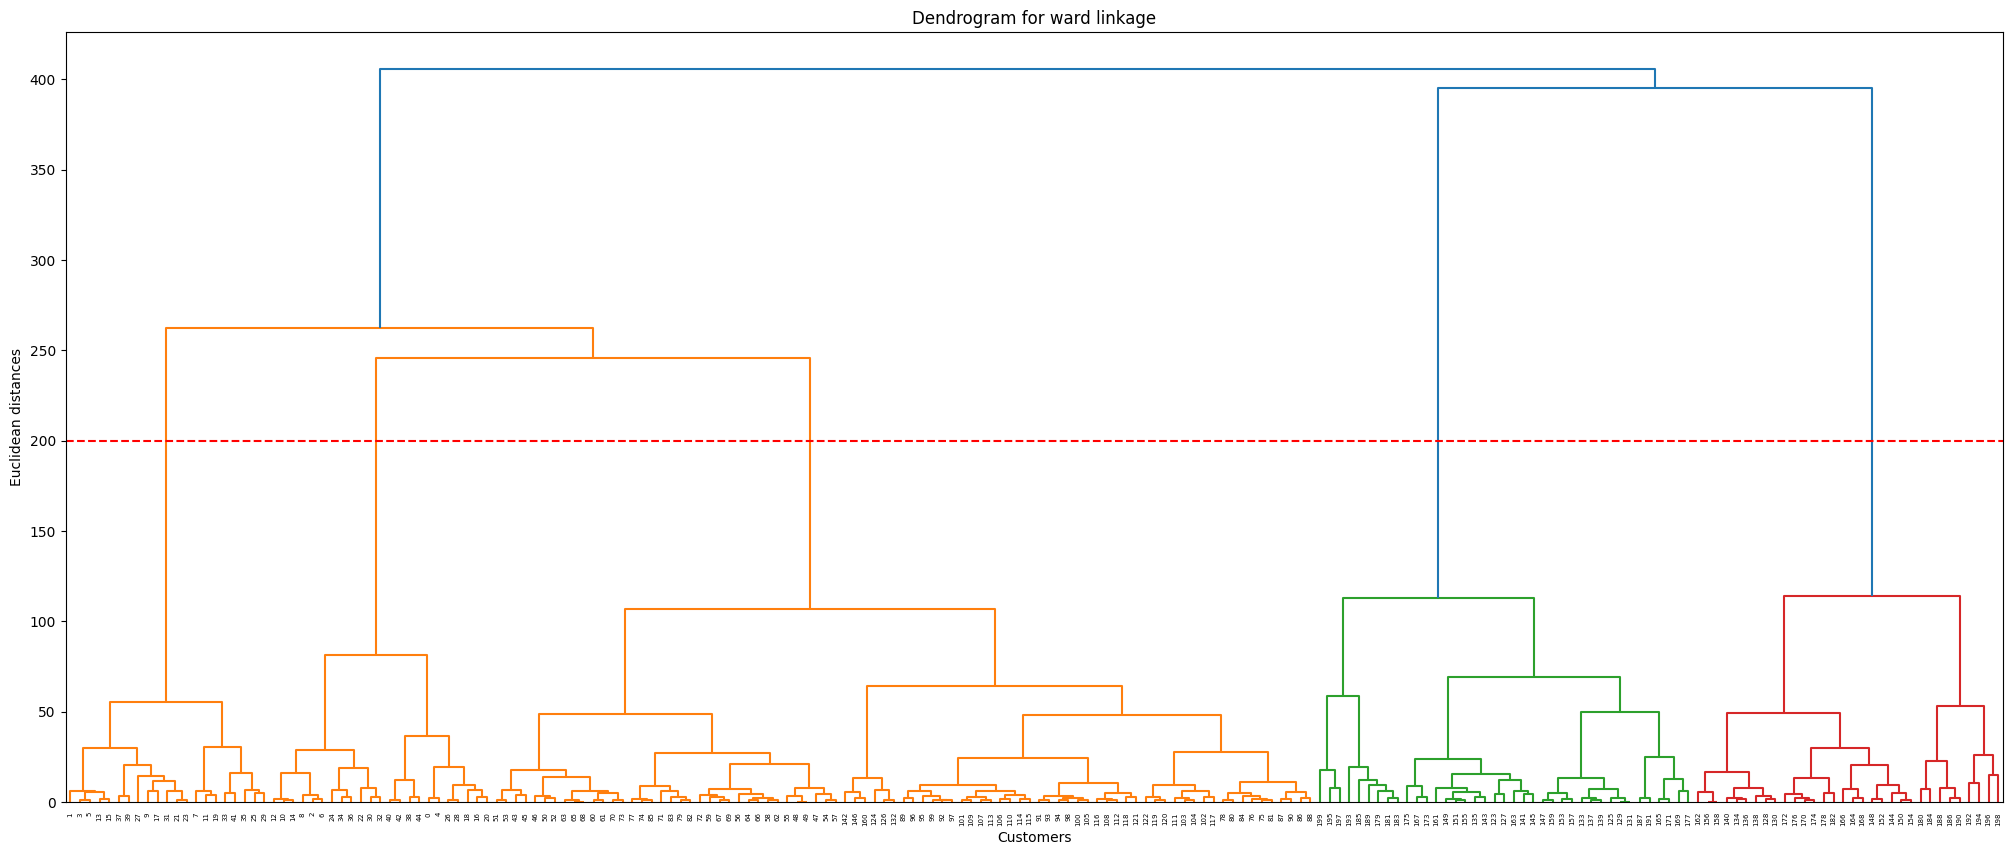

In [12]:
#  plotting the dendrogram for ward linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for ward linkage')
dendrogram(ward_clustering)
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=200, color='r', linestyle='--')
plt.show()


We want to find the longest vertical distance we can without crossing any horizontal lines, which is the red-framed line in the diagram above. Let’s count the lines on the diagram and figure out how many clusters are best. For this dataset, the cluster number will be 5.

In [13]:
# Fitting Hierarchical Clustering to the dataset for 5 clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
y_hc = hc.fit_predict(X)

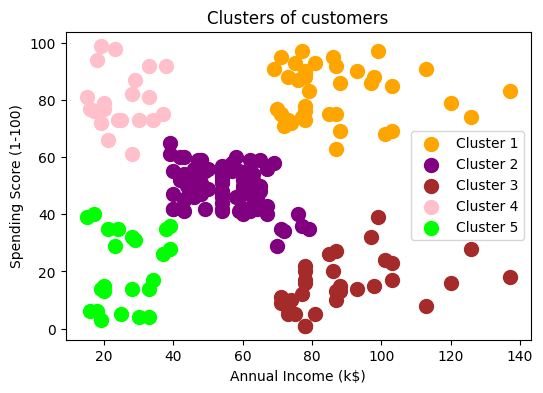

In [14]:
# Visualising the clusters
plt.figure(figsize=(6, 4))

# Changing the colors of the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'purple', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'brown', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'lime', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Manhattan distance

In [15]:
# Agglomerative Hierarchical Clustering for manhattan distance
from scipy.cluster.hierarchy import dendrogram, linkage
single_clustering=linkage(X, method='single', metric='cityblock')
complete_clustering=linkage(X, method='complete', metric='cityblock')
average_clustering=linkage(X, method='average', metric='cityblock')

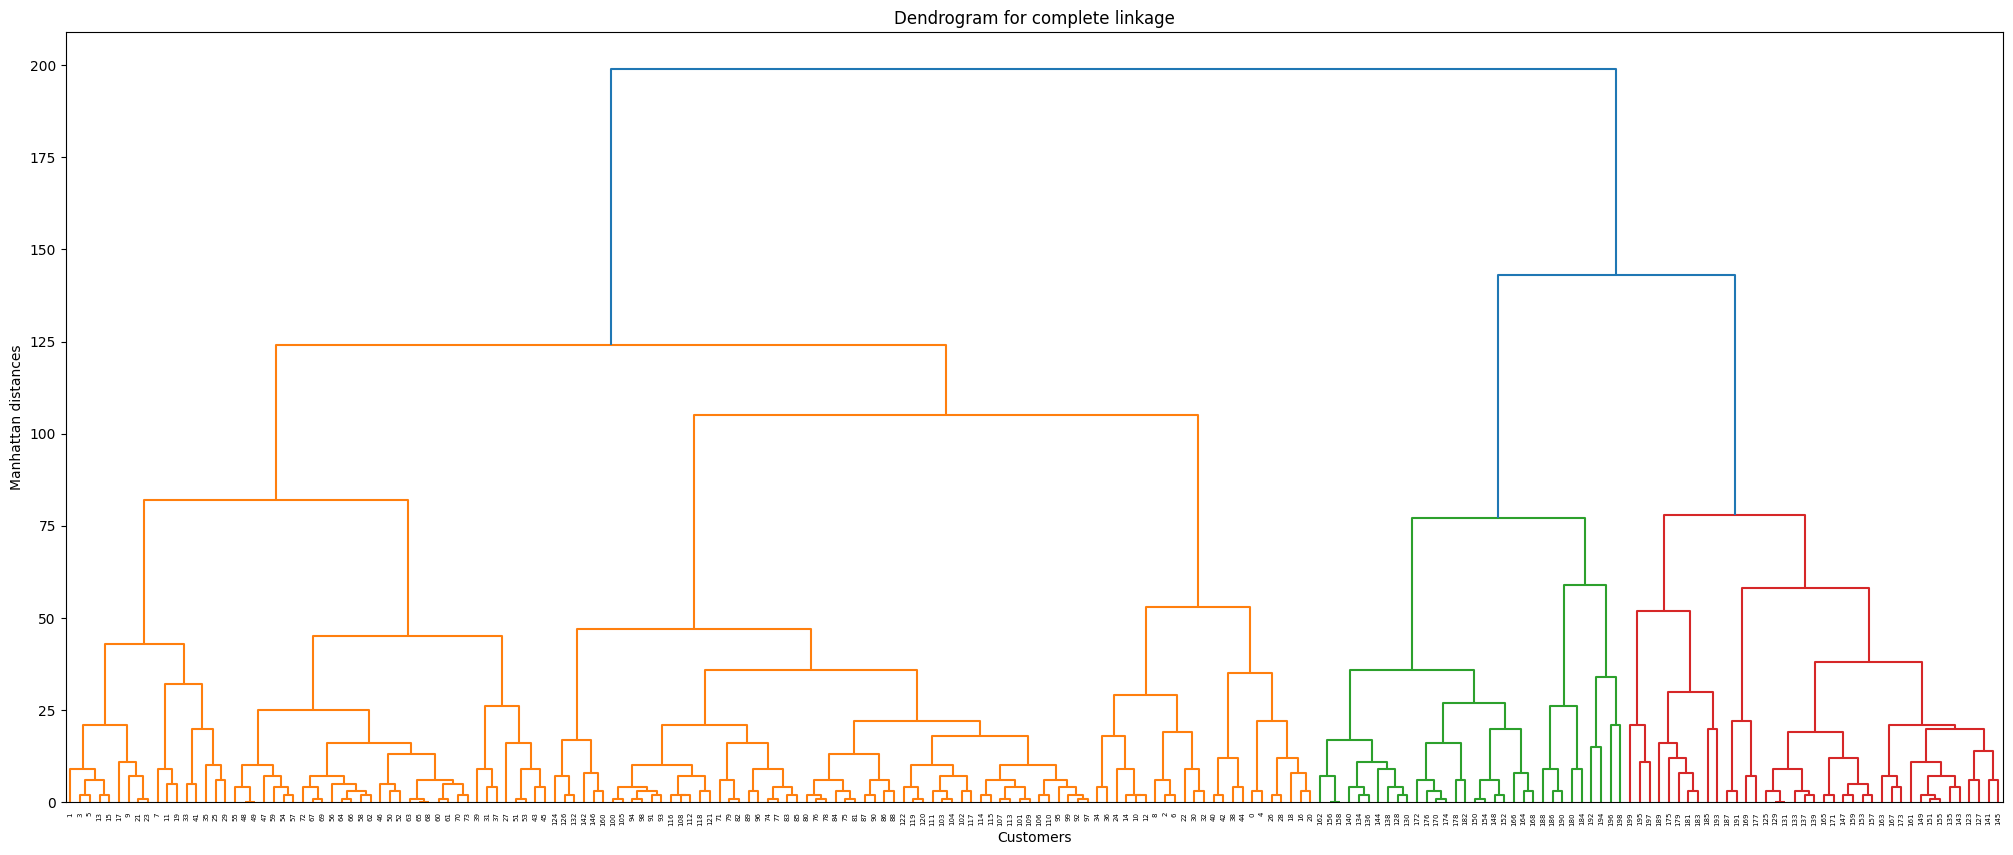

In [22]:
# plotting the dendrogram for complete linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for complete linkage')
dendrogram(complete_clustering)
plt.xlabel('Customers')
plt.ylabel('Manhattan distances')
plt.show()

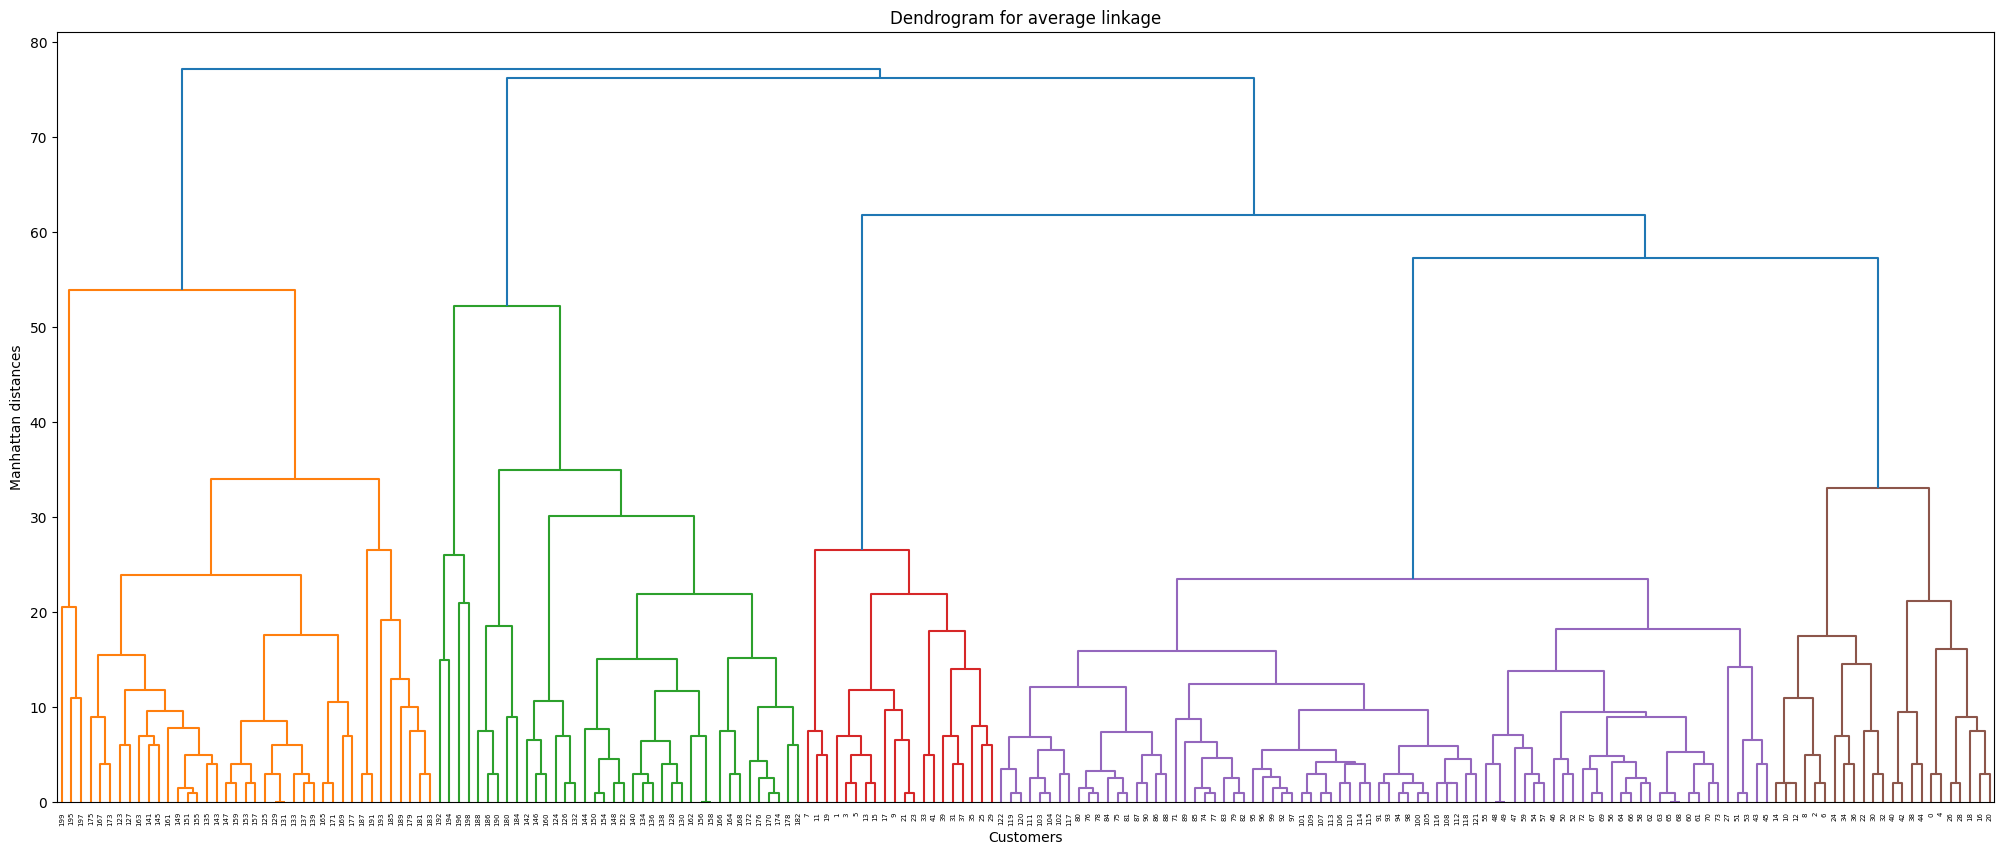

In [23]:
# plotting the dendrogram for average linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for average linkage')
dendrogram(average_clustering)
plt.xlabel('Customers')
plt.ylabel('Manhattan distances')
plt.show()

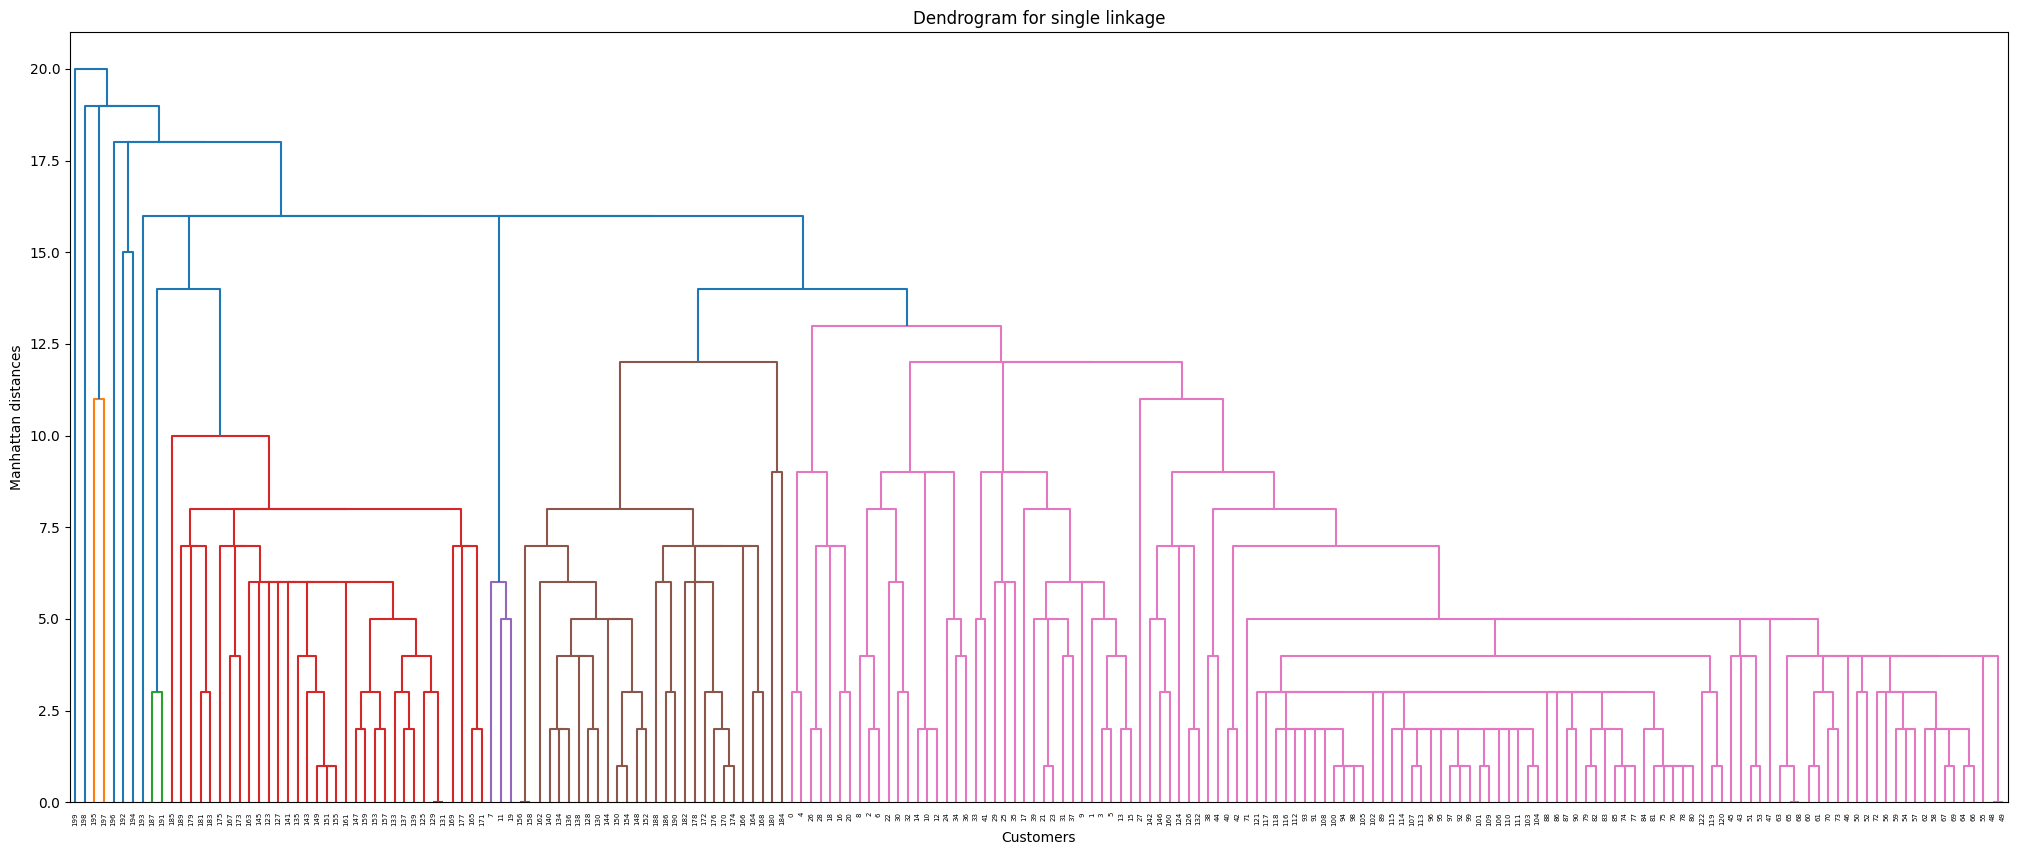

In [24]:
# plotting the dendrogram for single linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for single linkage')
dendrogram(single_clustering)
plt.xlabel('Customers')
plt.ylabel('Manhattan distances')
plt.show()

Maximum norm

In [25]:
# Hierarchical Clustering using maximum norm
def maximum_norm(u, v):
    return np.max(np.abs(u - v))

complete_clustering_maximum_norm = linkage(X, method='complete', metric=maximum_norm)
average_clustering_maximum_norm = linkage(X, method='average', metric=maximum_norm)
single_clustering_maximum_norm = linkage(X, method='single', metric=maximum_norm)

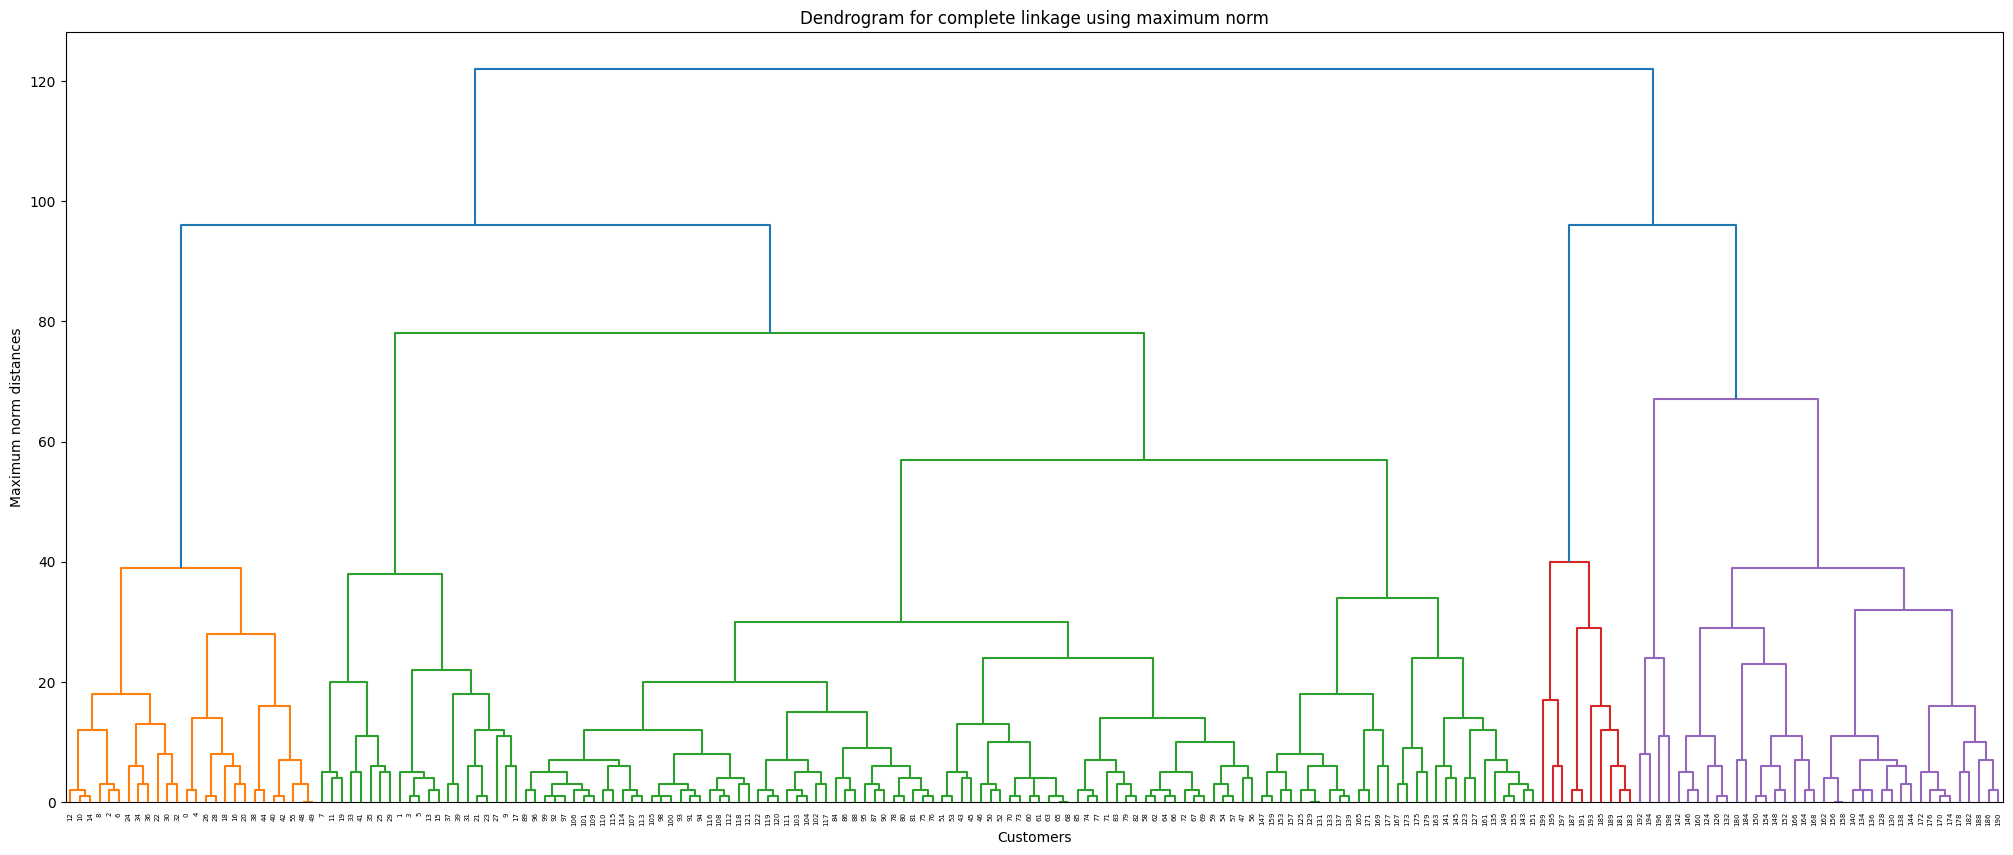

In [26]:
# plotting the dendrogram for complete linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for complete linkage using maximum norm')
dendrogram(complete_clustering_maximum_norm)
plt.xlabel('Customers')
plt.ylabel('Maximum norm distances')
plt.show()

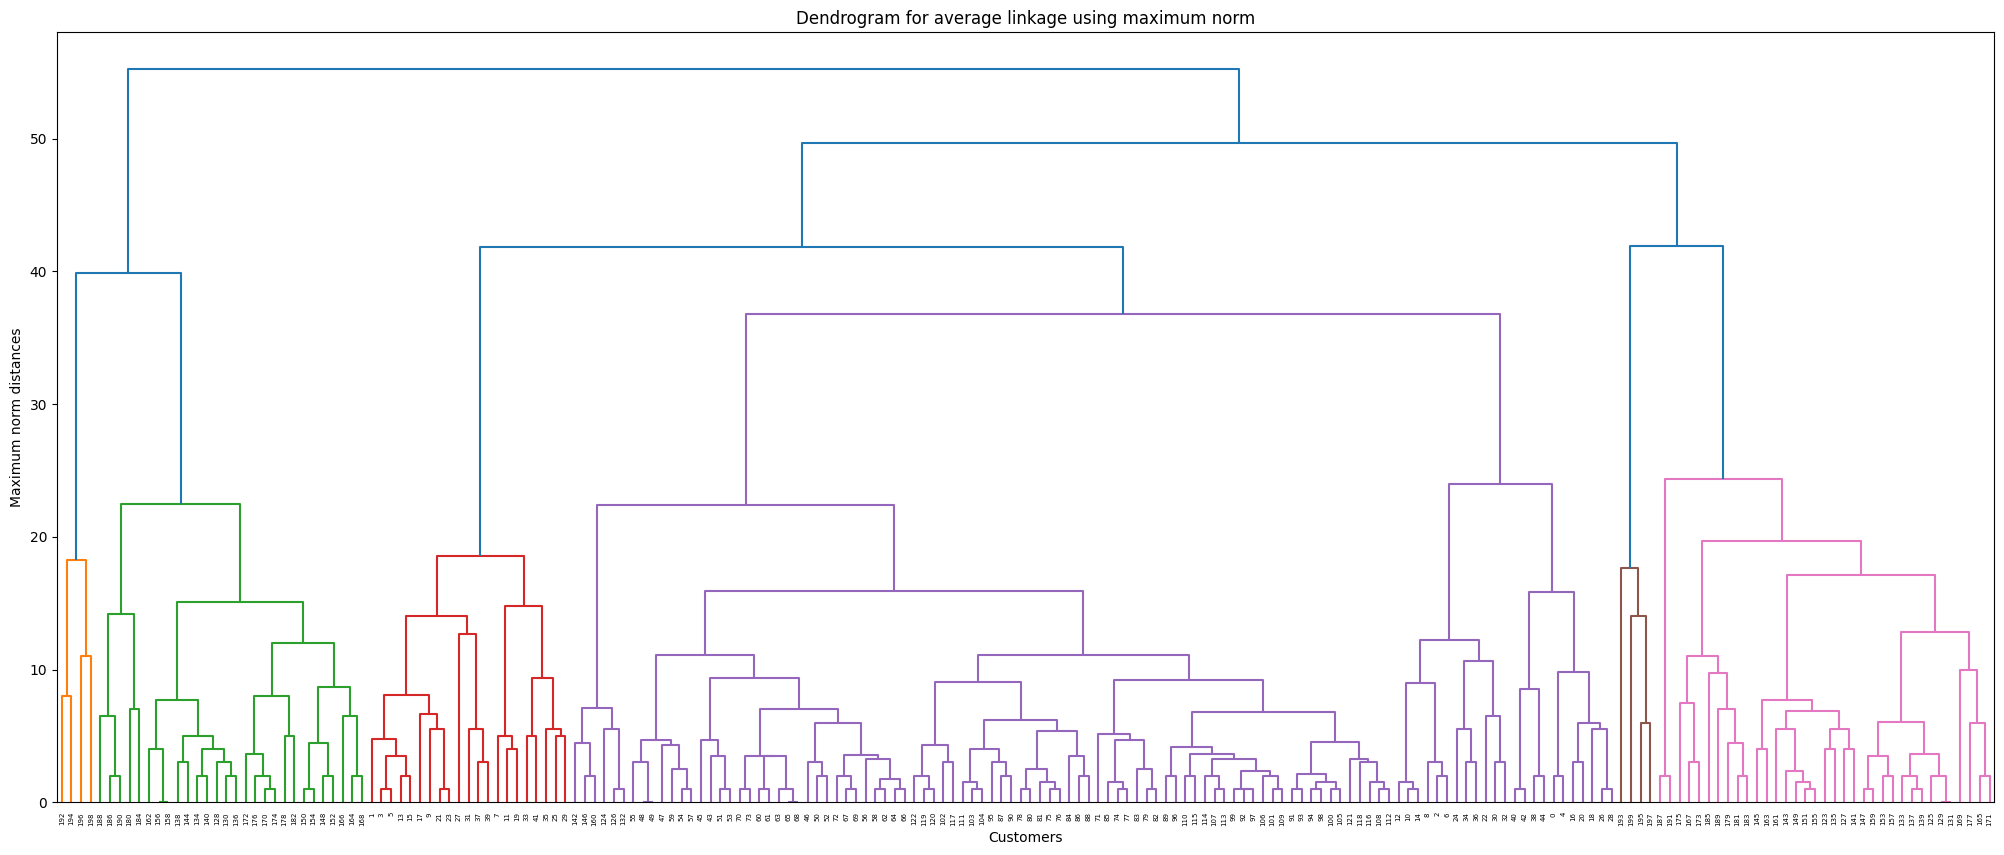

In [27]:
#  plotting the dendrogram for average linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for average linkage using maximum norm')
dendrogram(average_clustering_maximum_norm)
plt.xlabel('Customers')
plt.ylabel('Maximum norm distances')
plt.show()

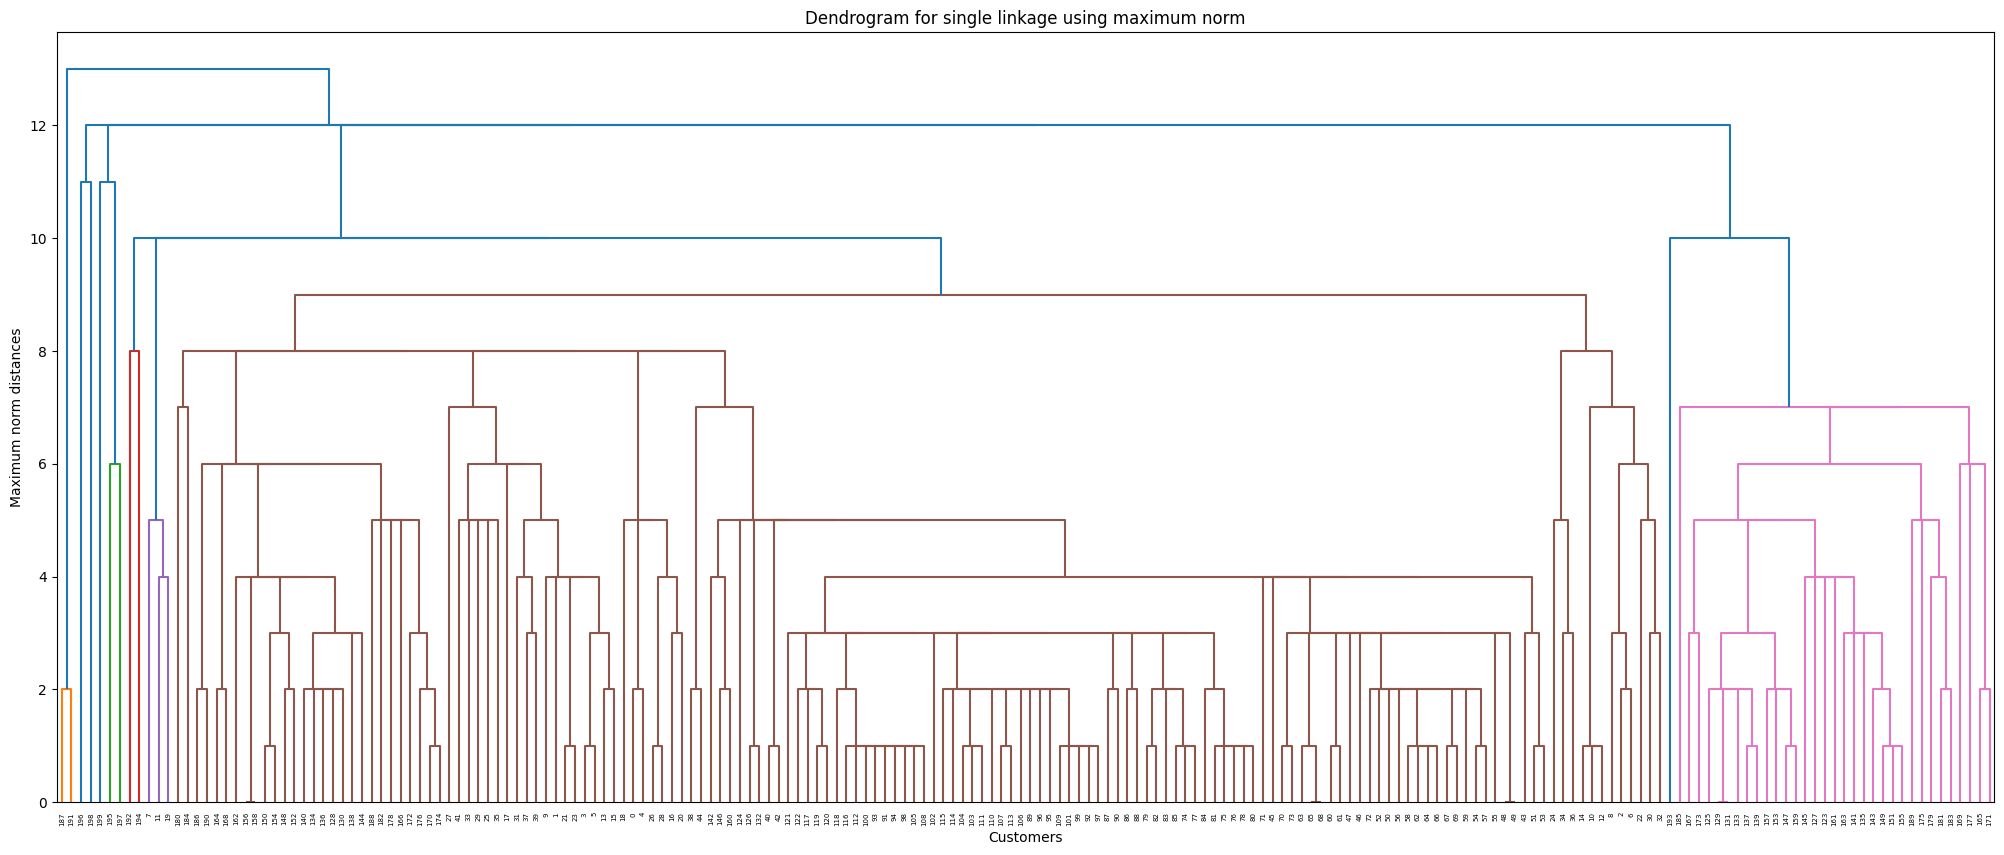

In [28]:
# plotting the dendrogram for single linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for single linkage using maximum norm')
dendrogram(single_clustering_maximum_norm)
plt.xlabel('Customers')
plt.ylabel('Maximum norm distances')
plt.show()

Mahalanobis Distance

In [29]:
# Hierarchial clustering using Mahalanobis Distance
from scipy.spatial.distance import mahalanobis
from scipy.linalg import pinv

# Calculate the inverse covariance matrix
inv_cov = pinv(np.cov(X.T))

def mahalanobis_distance(u, v):
    return mahalanobis(u, v, inv_cov)

complete_clustering_mahalanobis = linkage(X, method='complete', metric=mahalanobis_distance)
average_clustering_mahalanobis = linkage(X, method='average', metric=mahalanobis_distance)
single_clustering_mahalanobis = linkage(X, method='single', metric=mahalanobis_distance)


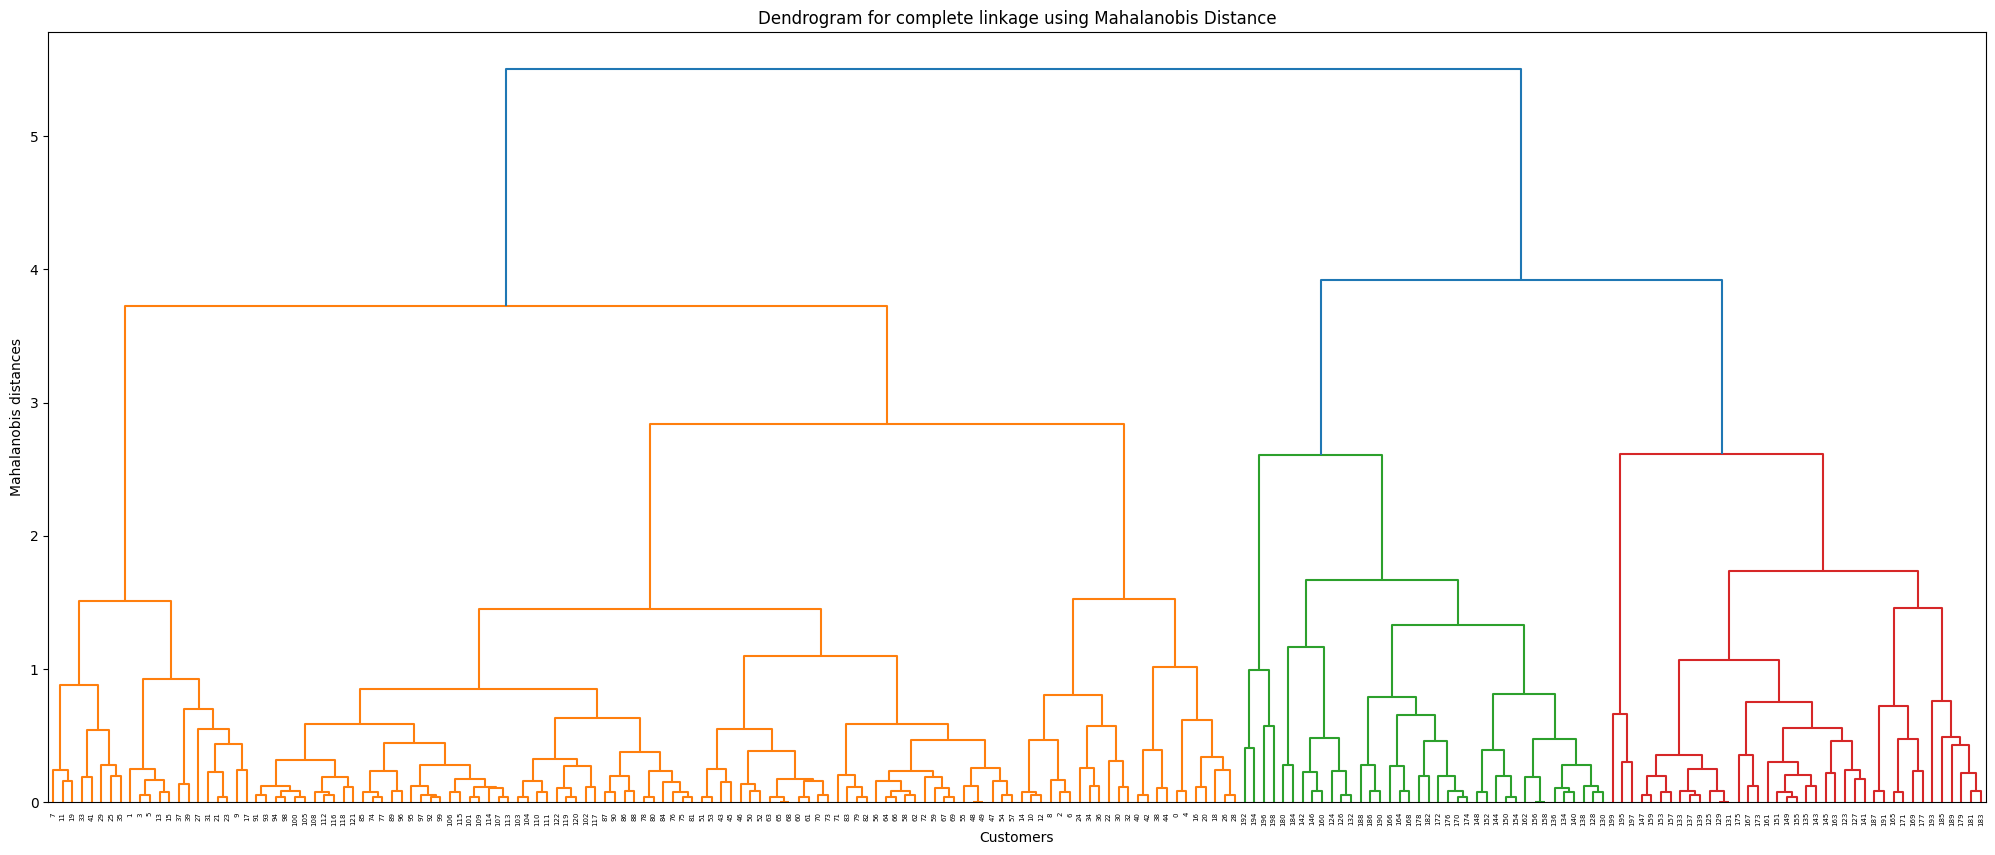

In [30]:
# plotting the dendrogram for complete linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for complete linkage using Mahalanobis Distance')
dendrogram(complete_clustering_mahalanobis)
plt.xlabel('Customers')
plt.ylabel('Mahalanobis distances')
plt.show()

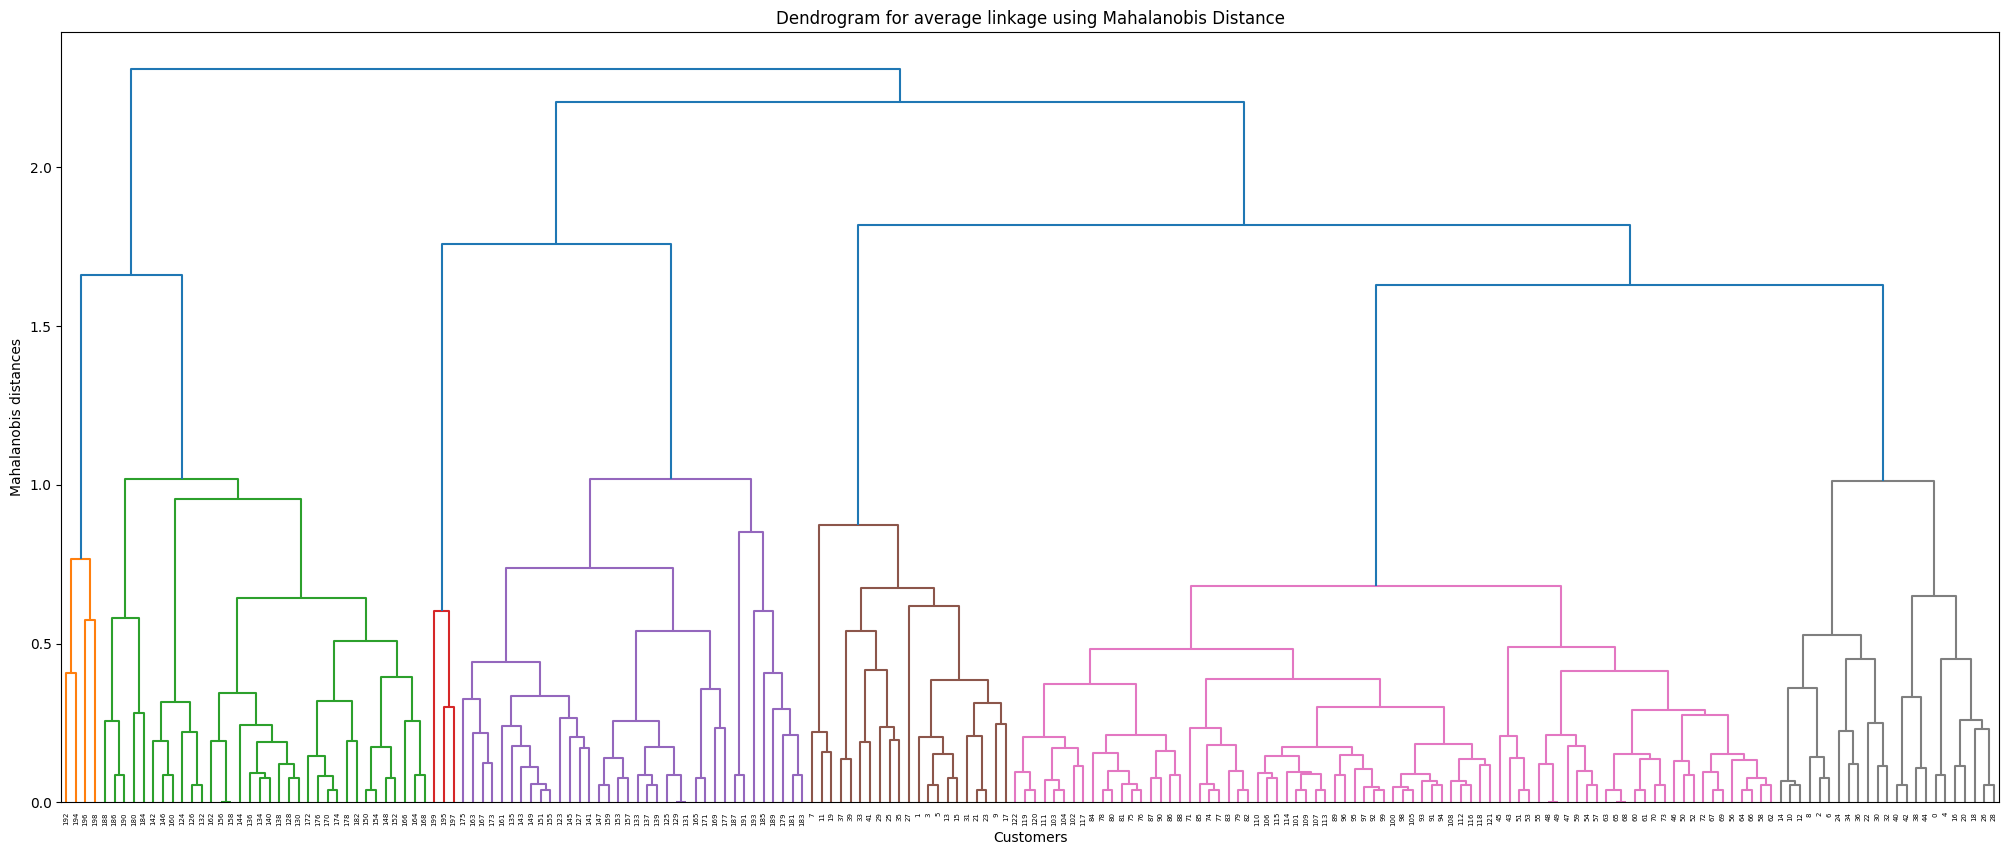

In [31]:
# plotting the dendrogram for average linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for average linkage using Mahalanobis Distance')
dendrogram(average_clustering_mahalanobis)
plt.xlabel('Customers')
plt.ylabel('Mahalanobis distances')
plt.show()

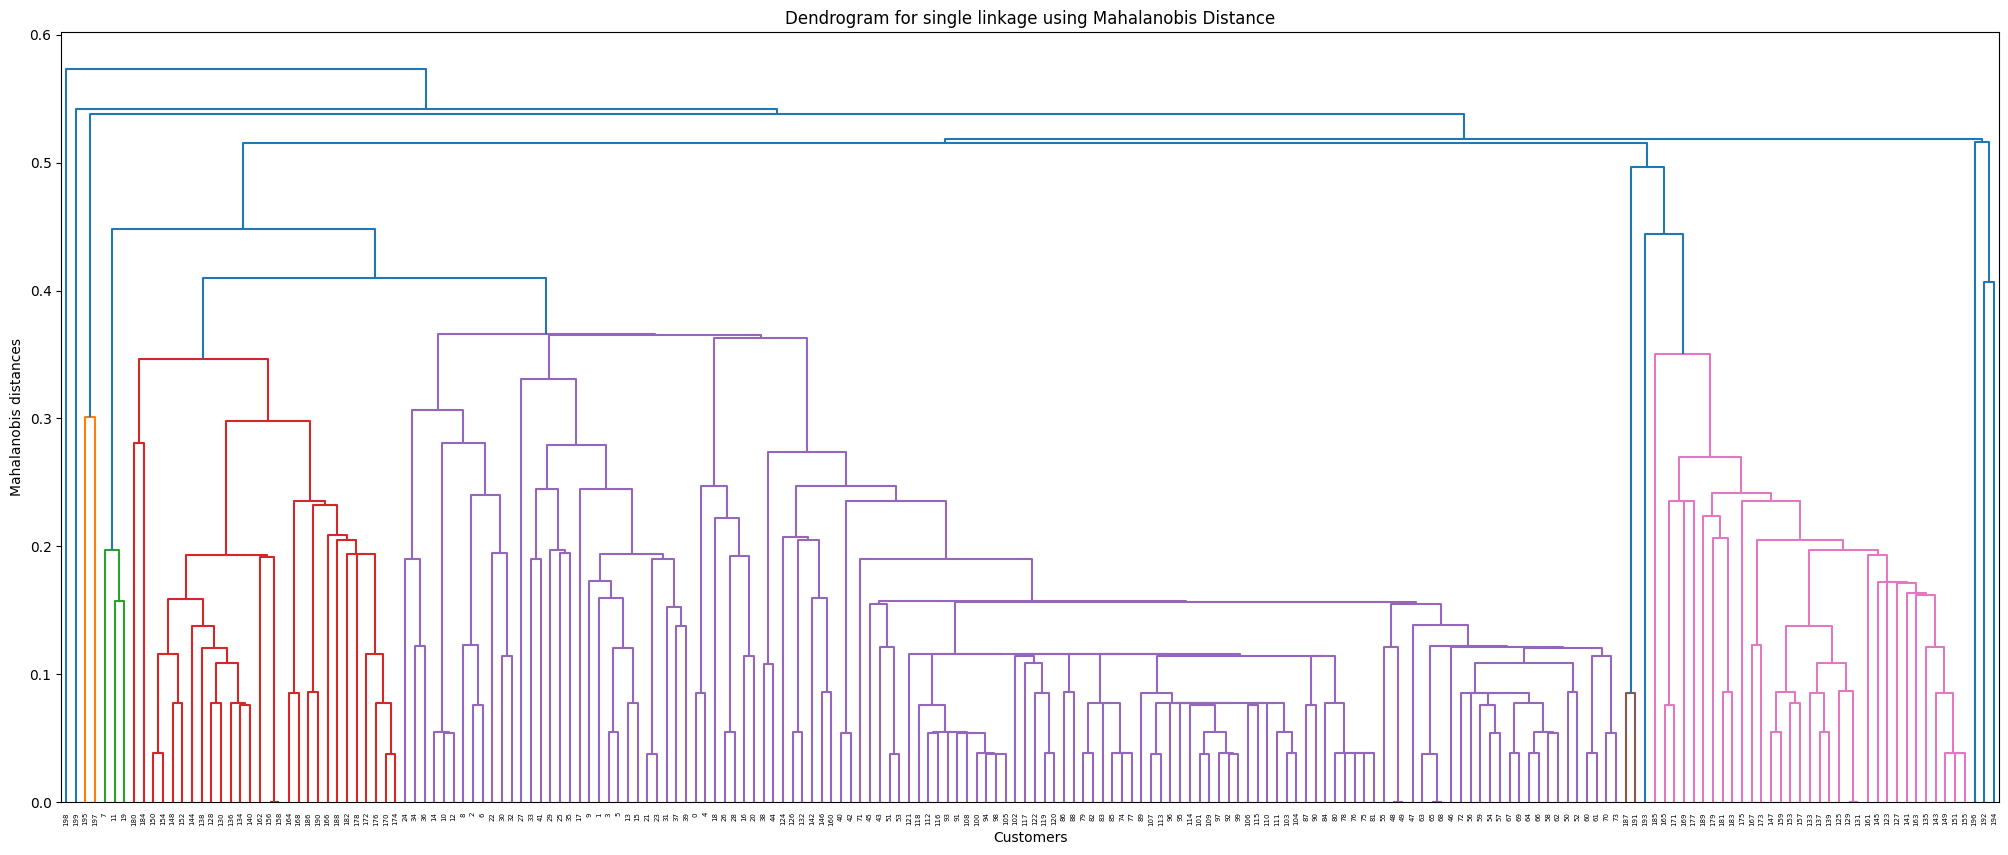

In [32]:
# plotting the dendrogram for single linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for single linkage using Mahalanobis Distance')
dendrogram(single_clustering_mahalanobis)
plt.xlabel('Customers')
plt.ylabel('Mahalanobis distances')
plt.show()

Hamming Distance

In [33]:
# Hierarchical Clustering using Hamming Distance
def hamming_distance(u, v):
    return np.sum(u != v)

complete_clustering_hamming = linkage(X, method='complete', metric=hamming_distance)
average_clustering_hamming = linkage(X, method='average', metric=hamming_distance)
single_clustering_hamming = linkage(X, method='single', metric=hamming_distance)


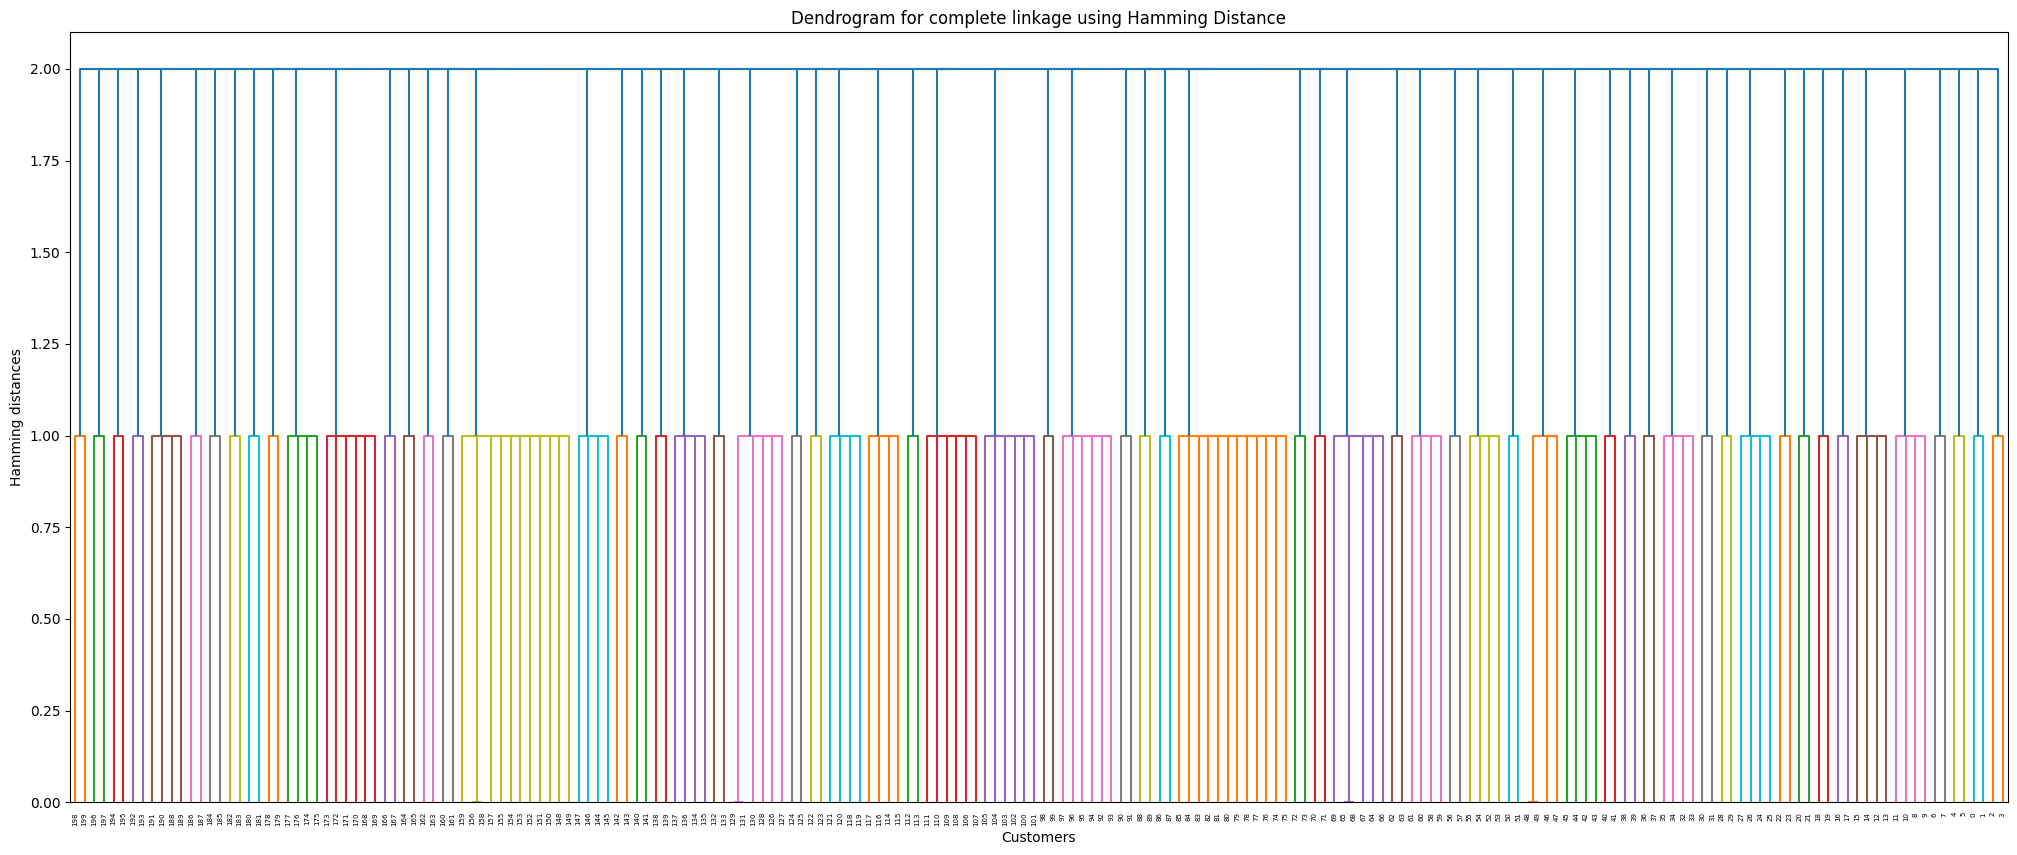

In [34]:
# plotting the dendrogram for complete linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for complete linkage using Hamming Distance')
dendrogram(complete_clustering_hamming)
plt.xlabel('Customers')
plt.ylabel('Hamming distances')
plt.show()

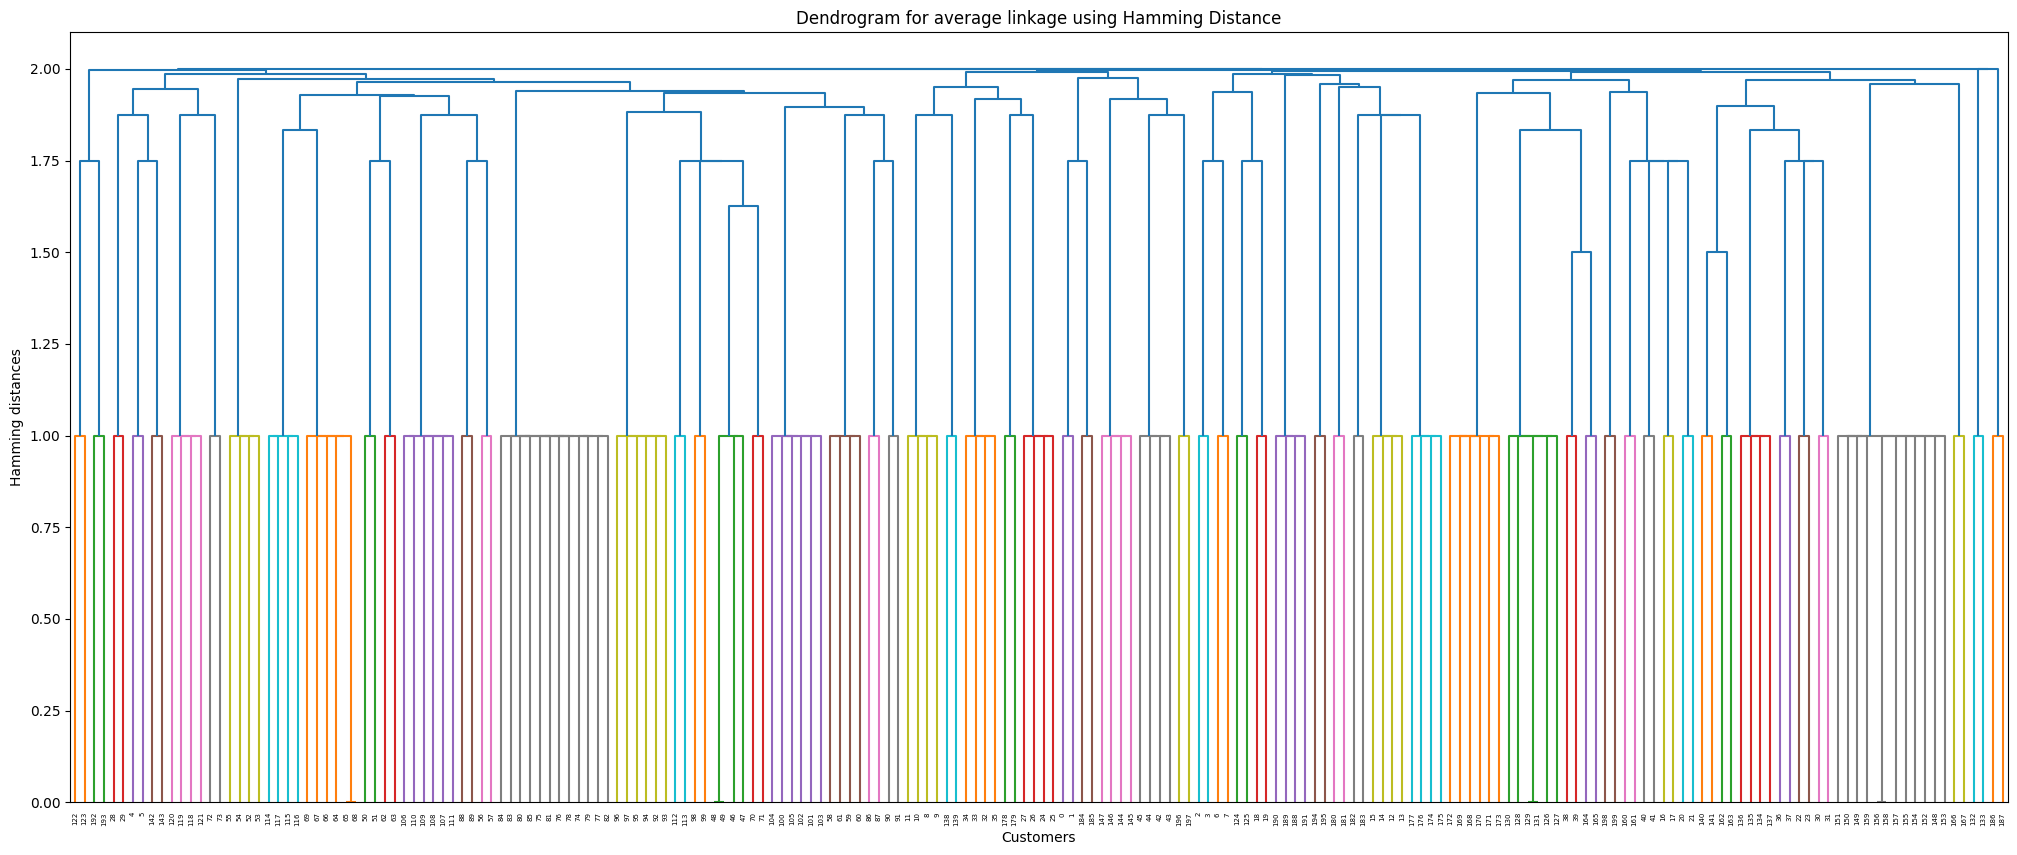

In [35]:
#  plotting the dendrogram for average linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for average linkage using Hamming Distance')
dendrogram(average_clustering_hamming)
plt.xlabel('Customers')
plt.ylabel('Hamming distances')
plt.show()

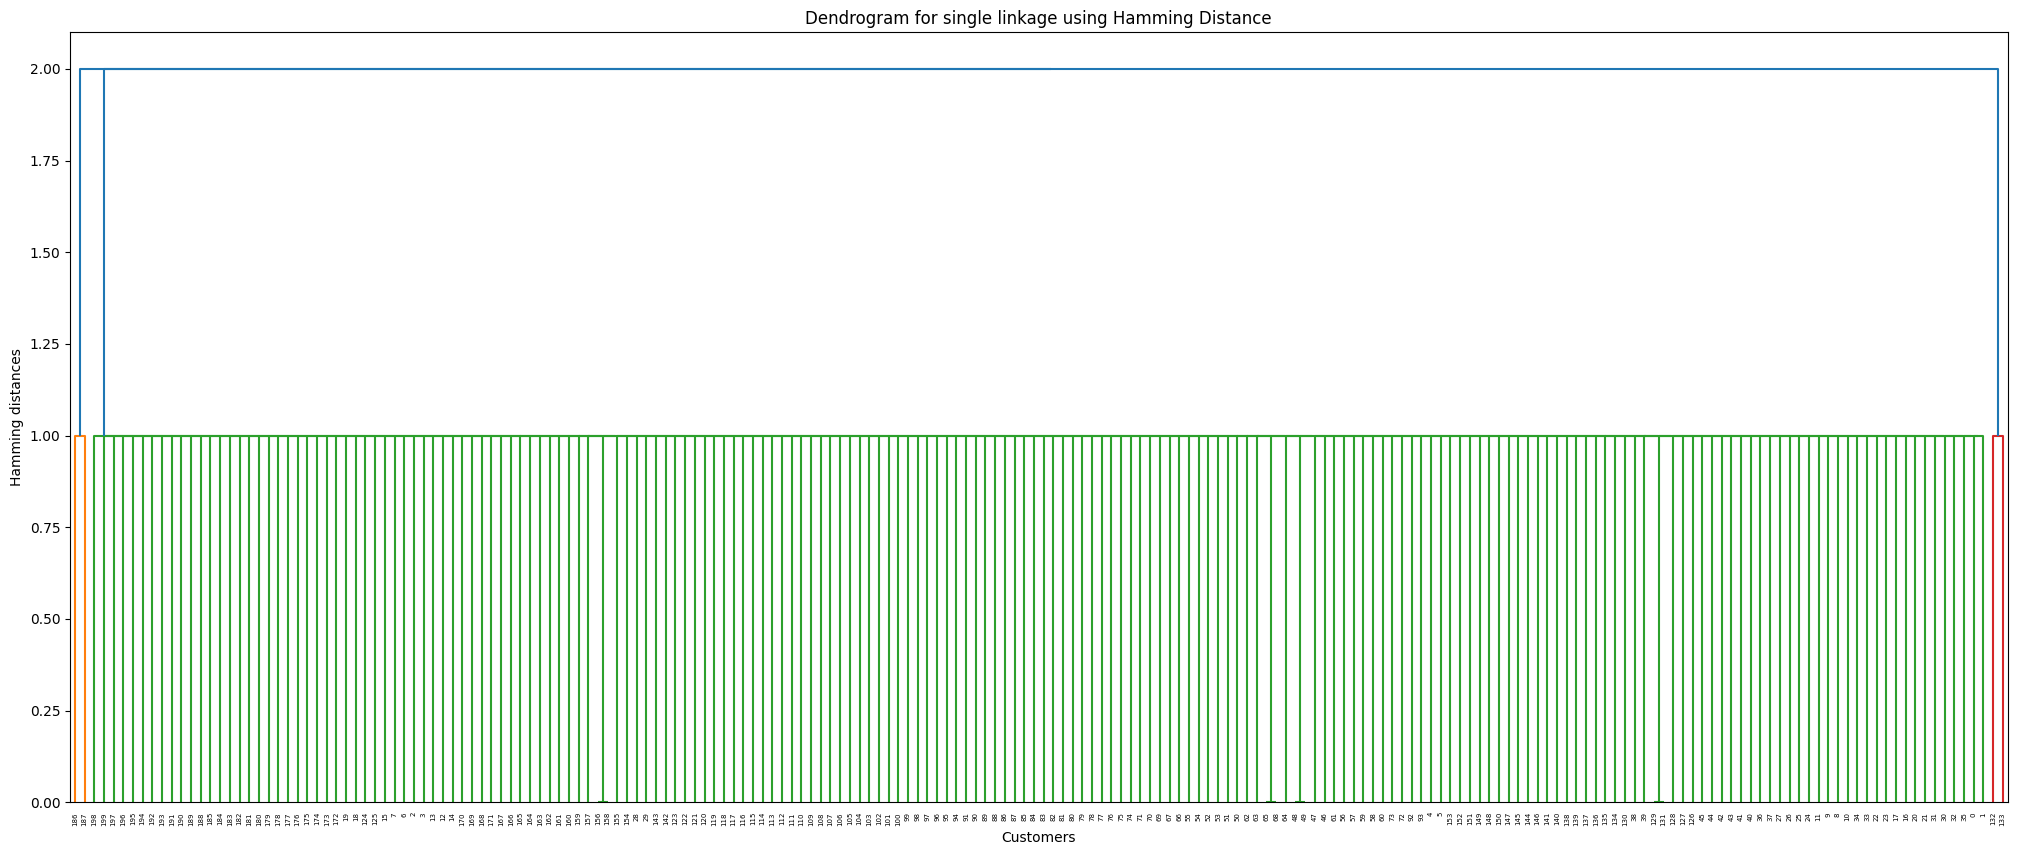

In [36]:
# plotting the dendrogram for single linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for single linkage using Hamming Distance')
dendrogram(single_clustering_hamming)
plt.xlabel('Customers')
plt.ylabel('Hamming distances')
plt.show()

b) ii) Diana Clustering

In [38]:
#  import the dataset
df = pd.read_csv('MallCustomers.csv')
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
X=df.iloc[:, [3, 4]].values

In [40]:
# %pip install fastcluster

In [118]:
# diana clustering from scratch
import fastcluster
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster

#  computing the distance matrix
distance_matrix = fastcluster.linkage(X, method='complete', metric='euclidean')



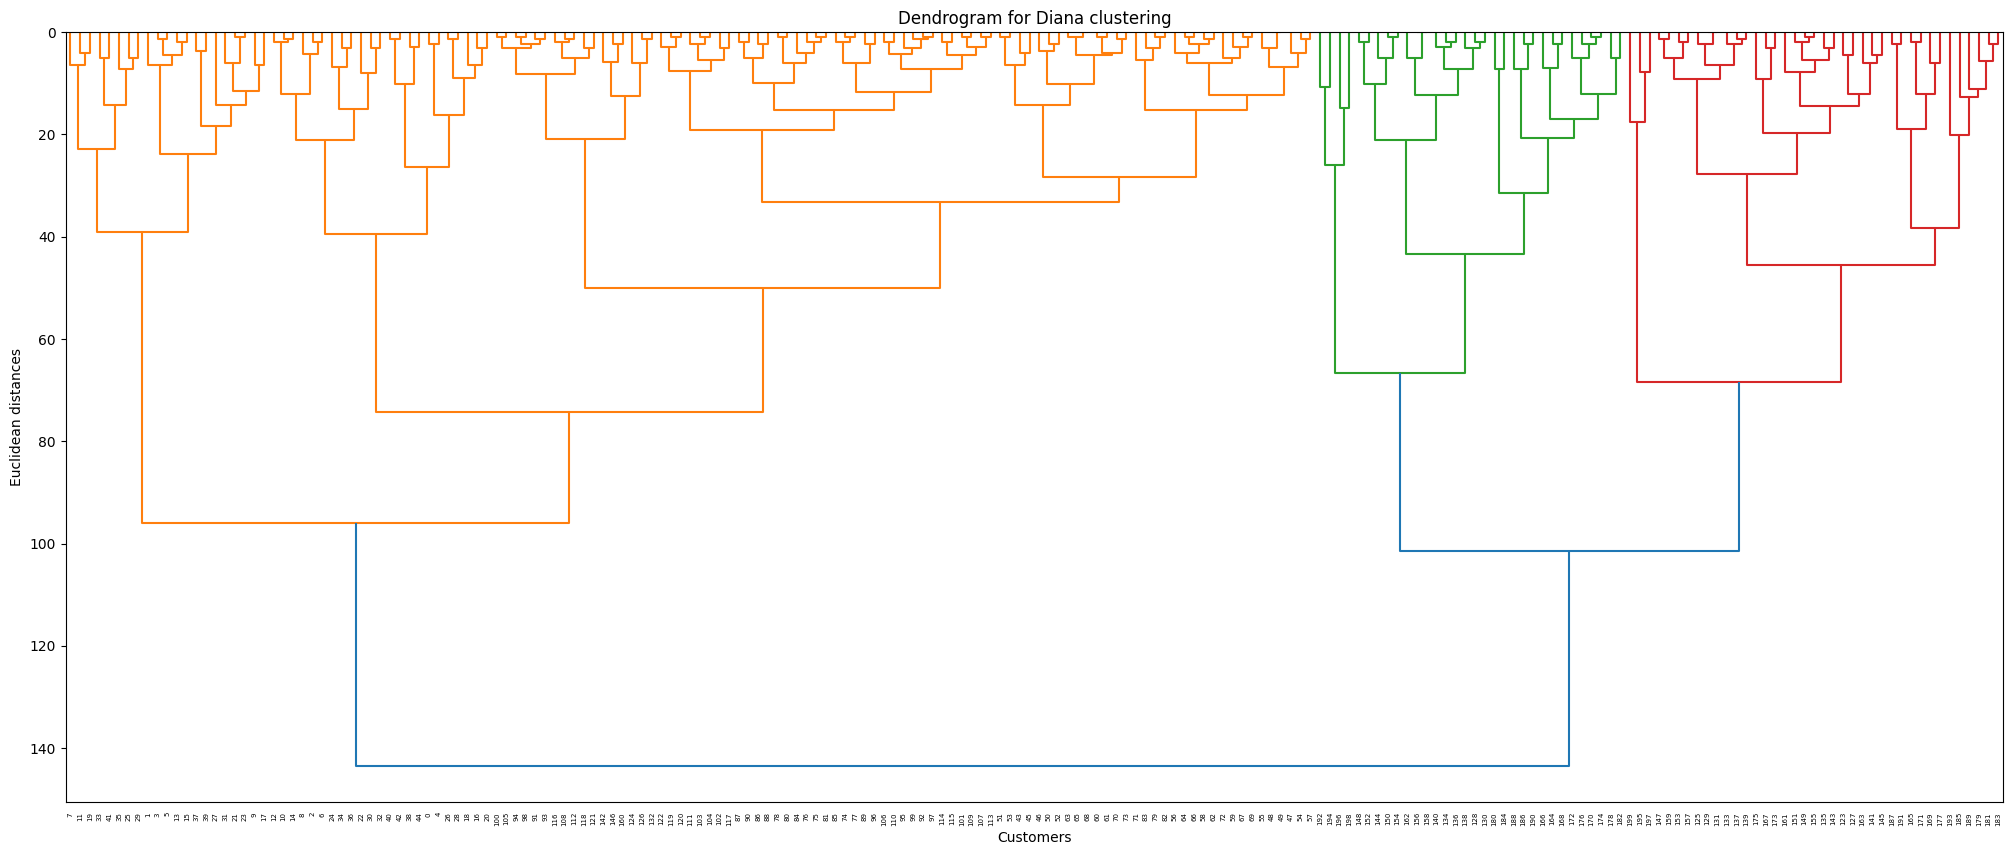

In [119]:
#  plotting the dendrogram
plt.figure(figsize=(25, 10))
plt.title('Dendrogram for Diana clustering')
dendrogram(distance_matrix)
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.gca().invert_yaxis()
plt.show()


a) Partitioning approach :K-mode, K-means++

In [1]:
# K-mode clustering on a np.arraary, using euclidian distance, showing the clusters in a tabular manner

In [3]:
# initialisng th dataset , column=points,X,Y rows= all the points
import numpy as np
data = np.array([[1, 4],
                [5, 1],
                [5, 3],
                [5, 4],
                [10, 4],
                [25, 4],
                [25, 6],
                [25, 7],
                [25, 8],
                [29, 7],])
                 

In [4]:
# lets choose [1,4] and [10.4] as mediods
# C1=[1,4] and C2=[10,4]
# lets calculate the distance of each point from these mediods, and present in a tabular manner X,Y,C1,C2
# we will use euclidian distance
import pandas as pd
from scipy.spatial import distance
C1=[1,4]
C2=[10,4]
df=pd.DataFrame(data,columns=['X','Y'])
df['C1']=df.apply(lambda x:distance.euclidean([x['X'],x['Y']],C1),axis=1)
df['C2']=df.apply(lambda x:distance.euclidean([x['X'],x['Y']],C2),axis=1)
print(df)

    X  Y         C1         C2
0   1  4   0.000000   9.000000
1   5  1   5.000000   5.830952
2   5  3   4.123106   5.099020
3   5  4   4.000000   5.000000
4  10  4   9.000000   0.000000
5  25  4  24.000000  15.000000
6  25  6  24.083189  15.132746
7  25  7  24.186773  15.297059
8  25  8  24.331050  15.524175
9  29  7  28.160256  19.235384


In [5]:
# decisiding the clusters for each points based on minimum distance from the mediods
# if distance from C1 is less than distance from C2, then the point belongs to C1, else C2
df['Cluster']=df.apply(lambda x:1 if x['C1']<x['C2'] else 2,axis=1)
print(df)

    X  Y         C1         C2  Cluster
0   1  4   0.000000   9.000000        1
1   5  1   5.000000   5.830952        1
2   5  3   4.123106   5.099020        1
3   5  4   4.000000   5.000000        1
4  10  4   9.000000   0.000000        2
5  25  4  24.000000  15.000000        2
6  25  6  24.083189  15.132746        2
7  25  7  24.186773  15.297059        2
8  25  8  24.331050  15.524175        2
9  29  7  28.160256  19.235384        2


In [7]:
#  finding cost between mediod points and non-mediod points
#  Total cost is the sum of distances of all points from their respective mediods
# cost((1,4),(5,1))= |1-5|+|4-1|
def cost(a,b):
    return abs(a[0]-b[0])+abs(a[1]-b[1])
# finding total cost
total_cost=0
for i in range(len(df)):
    if df['Cluster'][i]==1:
        total_cost+=cost(C1,[df['X'][i],df['Y'][i]])
    else:
        total_cost+=cost(C2,[df['X'][i],df['Y'][i]])
print(total_cost)

107


In [8]:
# selecting new mediods to do toal cost for them
c3=[5,4] 
c4=[25,7]
df['C3']=df.apply(lambda x:distance.euclidean([x['X'],x['Y']],c3),axis=1)
df['C4']=df.apply(lambda x:distance.euclidean([x['X'],x['Y']],c4),axis=1)
df['Cluster2']=df.apply(lambda x:3 if x['C3']<x['C4'] else 4,axis=1)
print(df)

    X  Y         C1         C2  Cluster         C3         C4  Cluster2
0   1  4   0.000000   9.000000        1   4.000000  24.186773         3
1   5  1   5.000000   5.830952        1   3.000000  20.880613         3
2   5  3   4.123106   5.099020        1   1.000000  20.396078         3
3   5  4   4.000000   5.000000        1   0.000000  20.223748         3
4  10  4   9.000000   0.000000        2   5.000000  15.297059         3
5  25  4  24.000000  15.000000        2  20.000000   3.000000         4
6  25  6  24.083189  15.132746        2  20.099751   1.000000         4
7  25  7  24.186773  15.297059        2  20.223748   0.000000         4
8  25  8  24.331050  15.524175        2  20.396078   1.000000         4
9  29  7  28.160256  19.235384        2  24.186773   4.000000         4


In [9]:
# total cost for new mediods
total_cost2=0
for i in range(len(df)):
    if df['Cluster2'][i]==3:
        total_cost2+=cost(c3,[df['X'][i],df['Y'][i]])
    else:
        total_cost2+=cost(c4,[df['X'][i],df['Y'][i]])
print(total_cost2)

22


In [10]:
# new cluster totalcost=22 and old cluster totalcost=107, so we will choose new mediods

In [13]:
# Using the k-modes clustering algorithm for the same dataset
from kmodes.kmodes import KModes
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data)
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 10.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 10.0
Best run was number 2
[[ 5  1]
 [25  4]]


In [16]:
# plotting elbow curve to find the optimal number of clusters using SSE
sse = []
for k in range(1, 11):
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
    km.fit_predict(data)
    sse.append(km.cost_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 12.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 12.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 12.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 12.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 12.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 

Kmode only has cost as result not the clusters

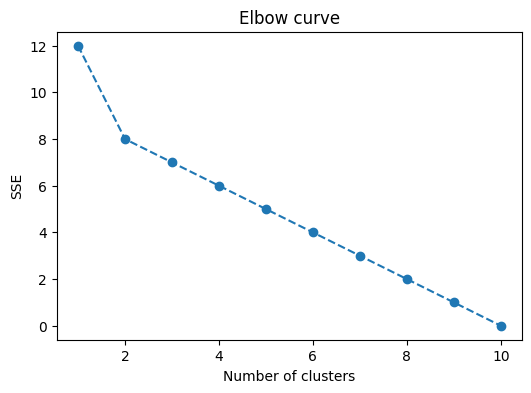

In [17]:
# plotting the elbow curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [43]:
# %pip install kmodes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


a) ii)K-means

In [20]:
# K means++ clustering
# k meanns++ is an algorithm that is used to initialize the centroids before running the k-means algorithm
# it is used to avoid the problem of initialization of centroids, which may lead to a bad clustering
# the k-means++ algorithm selects the first centroid randomly from the data points
# then it calculates the distance of each data point from the nearest centroid
# and selects the next centroid from the data points with probability proportional to the square of the distance
# this process is repeated until k centroids are selected

In [21]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [41]:
# loading the dataset
df = pd.read_csv('MallCustomers.csv')

In [42]:
# selecting the annual income and spending score columns
X = df.iloc[:, [3, 4]].values

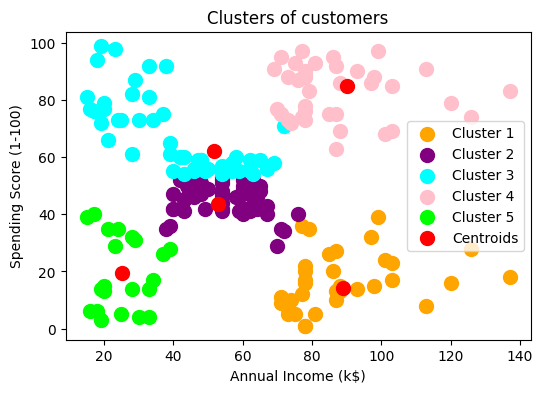

In [53]:
# plotting the first centroid using kmeans for 5 clusters
kmeans = KMeans(n_clusters=5, init='random', max_iter=1, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# plotting the clusters
plt.figure(figsize=(6, 4))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'lime', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

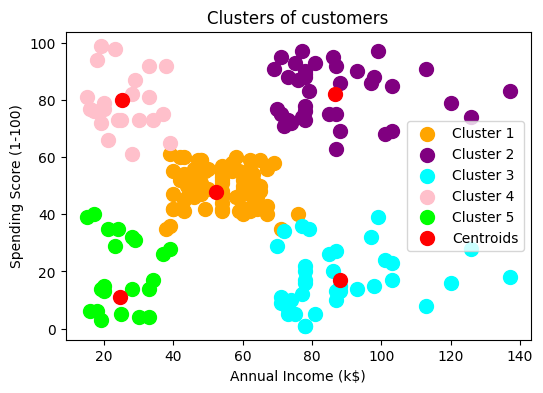

In [54]:
#   plotting the first centroid using  kmeans++ for 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=1, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# plotting the clusters
plt.figure(figsize=(6, 4))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'lime', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


We can see above the choice of centroids in the first iteration itself is very approriate in the kmeans++ as in comparison to random initialisation

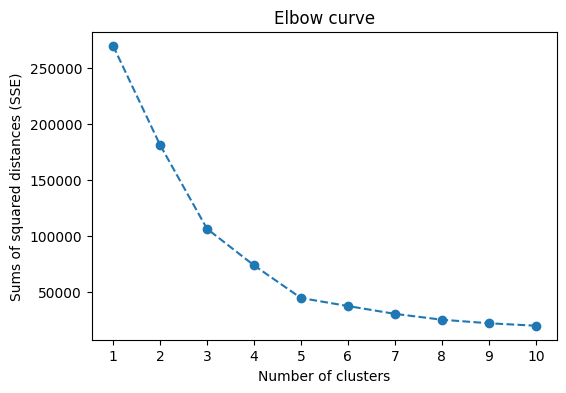

In [56]:
# finding the optimal number of clusters using the elbow method for kmeans++
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

# plotting the elbow curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), elbow, marker='o', linestyle='--')
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sums of squared distances (SSE)')
plt.xticks(range(1, 11))
plt.show()



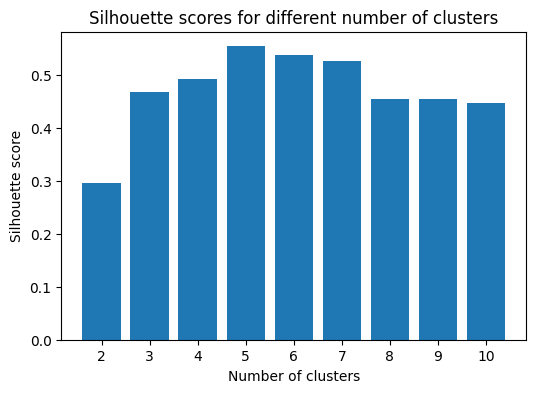

In [63]:
# plotting silhouette score to find the optimal number of clusters using kmeans++ in terms of bar graph
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# plotting the silhouette scores
plt.figure(figsize=(6, 4))
plt.bar(range(2, 11), silhouette_scores)
plt.title('Silhouette scores for different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(range(2, 11))
plt.show()


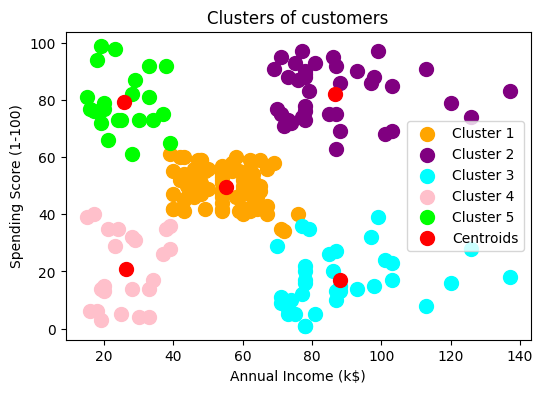

In [64]:
# plotting the clusters for k=5 using kmeans++
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# plotting the clusters
plt.figure(figsize=(6, 4))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'lime', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

c) DBSCAN

In [65]:
# Density Based Spatial Clustering of Applications with Noise (DBSCAN)
# Objective: to find the noise and core points and plot them, Then: find the border points, to make the final cluster

In [66]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN


In [67]:
# loading the dataset
df = pd.read_csv('MallCustomers.csv')
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
X = df.iloc[:, [3, 4]].values

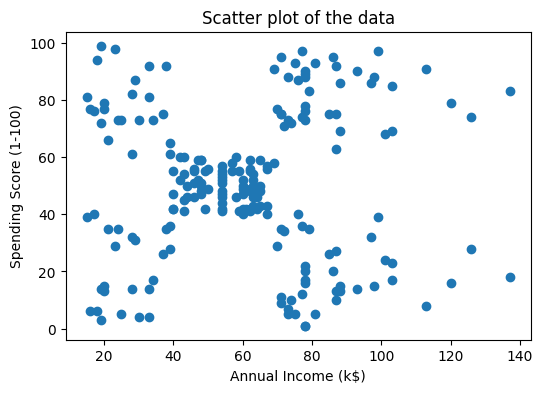

In [69]:
# plotting the data using a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X[:,0], X[:,1])
plt.title('Scatter plot of the data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [70]:
# fitting DBSCAN to the dataset
dbscan = DBSCAN(eps=3, min_samples=4)
clusters = dbscan.fit_predict(X)


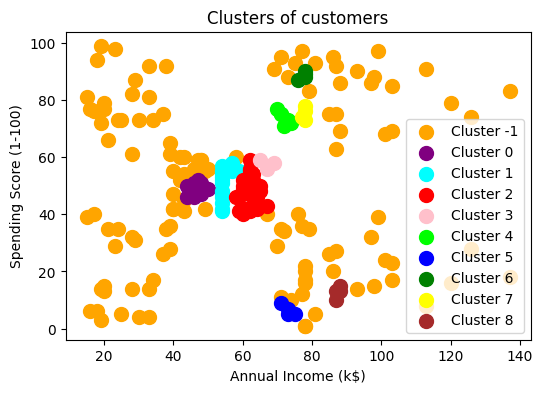

In [75]:
# plotting the clusters
plt.figure(figsize=(6, 4))

# Get unique cluster identifiers
unique_clusters = np.unique(clusters)

# Define a list of colors for the clusters
colors = ['orange', 'purple', 'cyan', 'red', 'pink', 'lime', 'blue', 'green', 'yellow', 'brown', 'black', 'grey', 'magenta', 'violet', 'indigo', 'gold', 'silver', 'olive', 'navy', 'maroon']

for i, cluster in enumerate(unique_clusters):
    plt.scatter(X[clusters == cluster, 0], X[clusters == cluster, 1], s = 100, c = colors[i % len(colors)], label = f'Cluster {cluster}')

# plotting the 
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [76]:
# As we can see above that the clusters are not appearing as expected, so we need to find the optimal value of eps and min_samples

In [108]:
epsilons =np.linspace(0.05,10,num=40)
epsilons

array([ 0.05      ,  0.30512821,  0.56025641,  0.81538462,  1.07051282,
        1.32564103,  1.58076923,  1.83589744,  2.09102564,  2.34615385,
        2.60128205,  2.85641026,  3.11153846,  3.36666667,  3.62179487,
        3.87692308,  4.13205128,  4.38717949,  4.64230769,  4.8974359 ,
        5.1525641 ,  5.40769231,  5.66282051,  5.91794872,  6.17307692,
        6.42820513,  6.68333333,  6.93846154,  7.19358974,  7.44871795,
        7.70384615,  7.95897436,  8.21410256,  8.46923077,  8.72435897,
        8.97948718,  9.23461538,  9.48974359,  9.74487179, 10.        ])

In [109]:
min_samples=np.arange(3,15,step=2)
min_samples

array([ 3,  5,  7,  9, 11, 13])

In [110]:
import itertools
combination =list(itertools.product(epsilons,min_samples))
combination

[(0.05, 3),
 (0.05, 5),
 (0.05, 7),
 (0.05, 9),
 (0.05, 11),
 (0.05, 13),
 (0.3051282051282051, 3),
 (0.3051282051282051, 5),
 (0.3051282051282051, 7),
 (0.3051282051282051, 9),
 (0.3051282051282051, 11),
 (0.3051282051282051, 13),
 (0.5602564102564103, 3),
 (0.5602564102564103, 5),
 (0.5602564102564103, 7),
 (0.5602564102564103, 9),
 (0.5602564102564103, 11),
 (0.5602564102564103, 13),
 (0.8153846153846154, 3),
 (0.8153846153846154, 5),
 (0.8153846153846154, 7),
 (0.8153846153846154, 9),
 (0.8153846153846154, 11),
 (0.8153846153846154, 13),
 (1.0705128205128205, 3),
 (1.0705128205128205, 5),
 (1.0705128205128205, 7),
 (1.0705128205128205, 9),
 (1.0705128205128205, 11),
 (1.0705128205128205, 13),
 (1.3256410256410256, 3),
 (1.3256410256410256, 5),
 (1.3256410256410256, 7),
 (1.3256410256410256, 9),
 (1.3256410256410256, 11),
 (1.3256410256410256, 13),
 (1.5807692307692307, 3),
 (1.5807692307692307, 5),
 (1.5807692307692307, 7),
 (1.5807692307692307, 9),
 (1.5807692307692307, 11),
 (1.5

In [111]:
N=len(combination)
N

240

In [112]:
def get_scores_and_labels(combinations,X):
    scores=[]
    all_labels_list=[]
    for i,(eps,min_samples) in enumerate(combinations):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = dbscan.labels_
        labels_set = set(labels)
        num_clusters=len(labels_set)
        if -1 in labels_set:
            num_clusters-=1
        if(num_clusters<2) or (num_clusters>100):
            scores.append(-10)
            all_labels_list.append('bad')
            c= (eps,min_samples)
            print(f'Combination {c} on {i+1} of {N} has {num_clusters} clusters.Moving to the next combination')
            continue
        scores.append(silhouette_score(X, labels))
        all_labels_list.append(labels)

    best_index=np.argmax(scores)
    best_parameter=combination[best_index]
    best_labels=all_labels_list[best_index]
    best_score=scores[best_index]

    return {
        'best_epsilons':best_parameter[0],
        'best_min_samples':best_parameter[1],
        'best_labels':best_labels,
        'best_score':best_score
    }

best_combination=get_scores_and_labels(combination,X)

Combination (0.05, 3) on 1 of 240 has 0 clusters.Moving to the next combination
Combination (0.05, 5) on 2 of 240 has 0 clusters.Moving to the next combination
Combination (0.05, 7) on 3 of 240 has 0 clusters.Moving to the next combination
Combination (0.05, 9) on 4 of 240 has 0 clusters.Moving to the next combination
Combination (0.05, 11) on 5 of 240 has 0 clusters.Moving to the next combination
Combination (0.05, 13) on 6 of 240 has 0 clusters.Moving to the next combination
Combination (0.3051282051282051, 3) on 7 of 240 has 0 clusters.Moving to the next combination
Combination (0.3051282051282051, 5) on 8 of 240 has 0 clusters.Moving to the next combination
Combination (0.3051282051282051, 7) on 9 of 240 has 0 clusters.Moving to the next combination
Combination (0.3051282051282051, 9) on 10 of 240 has 0 clusters.Moving to the next combination
Combination (0.3051282051282051, 11) on 11 of 240 has 0 clusters.Moving to the next combination
Combination (0.3051282051282051, 13) on 12 of

In [113]:
best_combination

{'best_epsilons': 9.234615384615385,
 'best_min_samples': 3,
 'best_labels': array([ 0,  1,  2,  1,  0,  1,  2,  3,  2,  1,  2,  3,  2,  1,  2,  1,  0,
         1,  0,  3,  0,  1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  1,  2,  1,
         2,  1,  2,  1,  4,  1,  4,  1,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  5,  4,  5,  4,  5,  6,  5,  6,  5,  4,  5,  6,  5,
         6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,
         5,  6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,  5,  6,  5,
         6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,
        -1,  6,  5,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 'best_score'

In [114]:
df['cluster']=best_combination['best_labels']
df['cluster'].value_counts()

cluster
 4    89
 5    33
 6    28
 1    18
 2    12
-1    10
 0     7
 3     3
Name: count, dtype: int64

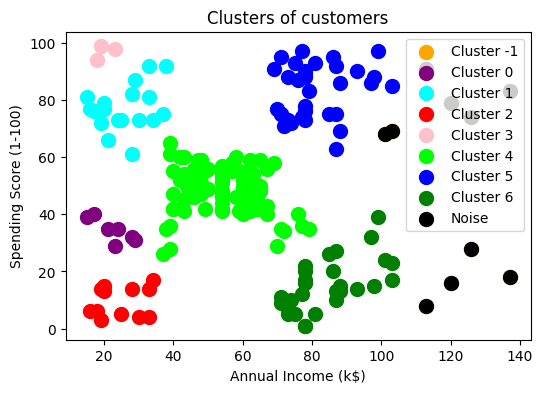

In [116]:
# plotting the clusters
plt.figure(figsize=(6, 4))

# Get unique cluster identifiers
unique_clusters = np.unique(best_combination['best_labels'])

# Define a list of colors for the clusters
colors = ['orange', 'purple', 'cyan', 'red', 'pink', 'lime', 'blue', 'green', 'yellow', 'brown', 'black', 'grey', 'magenta', 'violet', 'indigo', 'gold', 'silver', 'olive', 'navy', 'maroon']

for i, cluster in enumerate(unique_clusters):
    plt.scatter(X[best_combination['best_labels'] == cluster, 0], X[best_combination['best_labels'] == cluster, 1], s = 100, c = colors[i % len(colors)], label = f'Cluster {cluster}')
# plotting the ones having cluster valur as -1
plt.scatter(X[best_combination['best_labels'] == -1, 0], X[best_combination['best_labels'] == -1, 1], s = 100, c = 'black', label = 'Noise')

# plotting the
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
